# DATA PRE-PROCESSING AND EXPLORATORY DATA ANALYSIS

## Setup

In [244]:
#load relevant libraries and adjust visualisation settings 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

sns.set_context('poster')

## Load the data

In [245]:
#read in the data with pd.read_csv()
file_path = r"C:\AA LOLA USW CLASSES\Applied Machine Learning And Deep Learning\MS4S16_Dataset.csv"
diagnose = pd.read_csv(file_path)
diagnose

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302.0         M        17.99         10.38          122.80   
1      842517.0         M        20.57         17.77          132.90   
2    84300903.0         M        19.69         21.25          130.00   
3    84348301.0         M        11.42         20.38           77.58   
4    84358402.0         M        20.29         14.34          135.10   
..          ...       ...          ...           ...             ...   
566    926682.0         M        20.13         28.25          131.20   
567    926954.0         M        16.60         28.08          108.30   
568    927241.0         M        20.60         29.33          140.10   
569     92751.0         B         7.76         24.54           47.92   
570     92751.0         B         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
566     1261.0          0.09780           0.10340         0.14400   
567      858.1          0.08455           0.10230         0.09251   
568     1265.0          0.11780           0.27700         0.35140   
569      181.0          0.05263           0.04362         0.00000   
570      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
566              0.09791  ...        23.690          38.25           155.00   
567              0.05302  ...        18.980          34.12           126.70   
568              0.15200  ...        25.740          39.42           184.60   
569              0.00000  ...         9.456          30.37            59.16   
570              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
566      1731.0           0.11660            0.19220           0.3215   
567      1124.0           0.11390            0.30940           0.3403   
568      1821.0           0.16500            0.86810           0.9387   
569       268.6           0.08996            0.06444           0.0000   
570       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
566       

## Data Cleaning

In [246]:
#dropping duplicates in the dataset
result = diagnose.drop_duplicates()
result

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302.0         M        17.99         10.38          122.80   
1      842517.0         M        20.57         17.77          132.90   
2    84300903.0         M        19.69         21.25          130.00   
3    84348301.0         M        11.42         20.38           77.58   
4    84358402.0         M        20.29         14.34          135.10   
..          ...       ...          ...           ...             ...   
565    926424.0         M        21.56         22.39          142.00   
566    926682.0         M        20.13         28.25          131.20   
567    926954.0         M        16.60         28.08          108.30   
568    927241.0         M        20.60         29.33          140.10   
569     92751.0         B         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
565     1479.0          0.11100           0.11590         0.24390   
566     1261.0          0.09780           0.10340         0.14400   
567      858.1          0.08455           0.10230         0.09251   
568     1265.0          0.11780           0.27700         0.35140   
569      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
565              0.13890  ...        25.450          26.40           166.10   
566              0.09791  ...        23.690          38.25           155.00   
567              0.05302  ...        18.980          34.12           126.70   
568              0.15200  ...        25.740          39.42           184.60   
569              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
565      2027.0           0.14100            0.21130           0.4107   
566      1731.0           0.11660            0.19220           0.3215   
567      1124.0           0.11390            0.30940           0.3403   
568      1821.0           0.16500            0.86810           0.9387   
569       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
565       

### Removing Null Values

In [247]:
#Replacing -999 and 0 with null values 
result_copy = result.copy()
result_copy.replace(-999, np.nan, inplace=True)
result_copy = result_copy.mask(result_copy.eq(0), pd.NA)

In [248]:
#filling null values with mean value
median_values = result_copy.median(numeric_only=True)
result_filled = result_copy.copy()
result_filled.fillna(median_values, inplace=True)

In [249]:
#remove rows where the value in the diagnosis column is null.
result_filled = result_filled[result_filled['diagnosis'].notnull()]

In [250]:
#checking for null values
result_filled.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Feature Engineering Techniques

### Correlation Analysis

In [251]:
#calculates the correlation matrix for result_filled
corr = result_filled.corr()
corr

C:\Users\DELL\AppData\Local\Temp\ipykernel_3800\1755559713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = result_filled.corr()


id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.077859      0.063643        0.074546   
radius_mean              0.077859     1.000000      0.276632        0.989612   
texture_mean             0.063643     0.276632      1.000000        0.293205   
perimeter_mean           0.074546     0.989612      0.293205        1.000000   
area_mean                0.098411     0.977328      0.281621        0.985114   
smoothness_mean         -0.011705     0.163602     -0.011666        0.204685   
compactness_mean         0.001827     0.497277      0.224097        0.554366   
concavity_mean           0.048272     0.646067      0.270051        0.699005   
concave points_mean      0.042169     0.796218      0.254256        0.834480   
symmetry_mean            0.002320     0.175152      0.057684        0.189763   
fractal_dimension_mean  -0.049892    -0.314363     -0.061454       -0.264442   
radius_se                0.143529     0.677001      0.213742        0.688781   
texture_se              -0.007204    -0.107238      0.331975       -0.086965   
perimeter_se             0.137760     0.673813      0.226253        0.693437   
area_se                  0.177320     0.733709      0.197915        0.743121   
smoothness_se            0.099236    -0.223712     -0.017462       -0.198648   
compactness_se           0.013795     0.205304      0.165433        0.254459   
concavity_se             0.052896     0.158533      0.123191        0.201235   
concave points_se        0.075194     0.321880      0.145517        0.362949   
symmetry_se             -0.018008    -0.104474      0.013773       -0.080622   
fractal_dimension_se    -0.009251    -0.062047     -0.050712       -0.060500   
radius_worst             0.086703     0.955473      0.314833        0.958671   
texture_worst            0.069106     0.274218      0.815168        0.287969   
perimeter_worst          0.033412     0.507229      0.250378        0.522698   
area_worst               0.085687     0.756402      0.210731        0.759868   
smoothness_worst         0.011579     0.113205      0.080386        0.147069   
compactness_worst       -0.001605     0.409922      0.261908        0.454326   
concavity_worst          0.019196     0.492558      0.281377        0.539924   
concave points_worst     0.030389     0.710400      0.285763        0.747000   
symmetry_worst          -0.044194     0.162541      0.114001        0.187526   
fractal_dimension_worst -0.027812     0.004832      0.116386        0.048628   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.098411        -0.011705          0.001827   
radius_mean               0.977328         0.163602          0.497277   
texture_mean              0.281621        -0.011666          0.224097   
perimeter_mean            0.985114         0.204685          0.554366   
area_mean                 1.000000         0.174701          0.496650   
smoothness_mean           0.174701         1.000000          0.658781   
compactness_mean          0.496650         0.658781          1.000000   
concavity_mean            0.674333         0.513900          0.874501   
concave points_mean       0.814414         0.540140          0.806675   
symmetry_mean             0.188701         0.176153          0.267486   
fractal_dimension_mean   -0.284584         0.545292          0.542368   
radius_se                 0.727585         0.303219          0.496922   
texture_se               -0.069117         0.071328          0.047027   
perimeter_se              0.726148         0.296053          0.549050   
area_se                   0.797793         0.249566          0.457502   
smoothness_se            -0.164295         0.326500          0.132766   
compactness_se            0.217208         0.329636          0.731637   
concavity_se              0.186578         0.236716          0.555248   
concave points_se         0.337213         0.365137          0.624477   
symmetry_s

### Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_3800\939691177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = result_filled.corr()


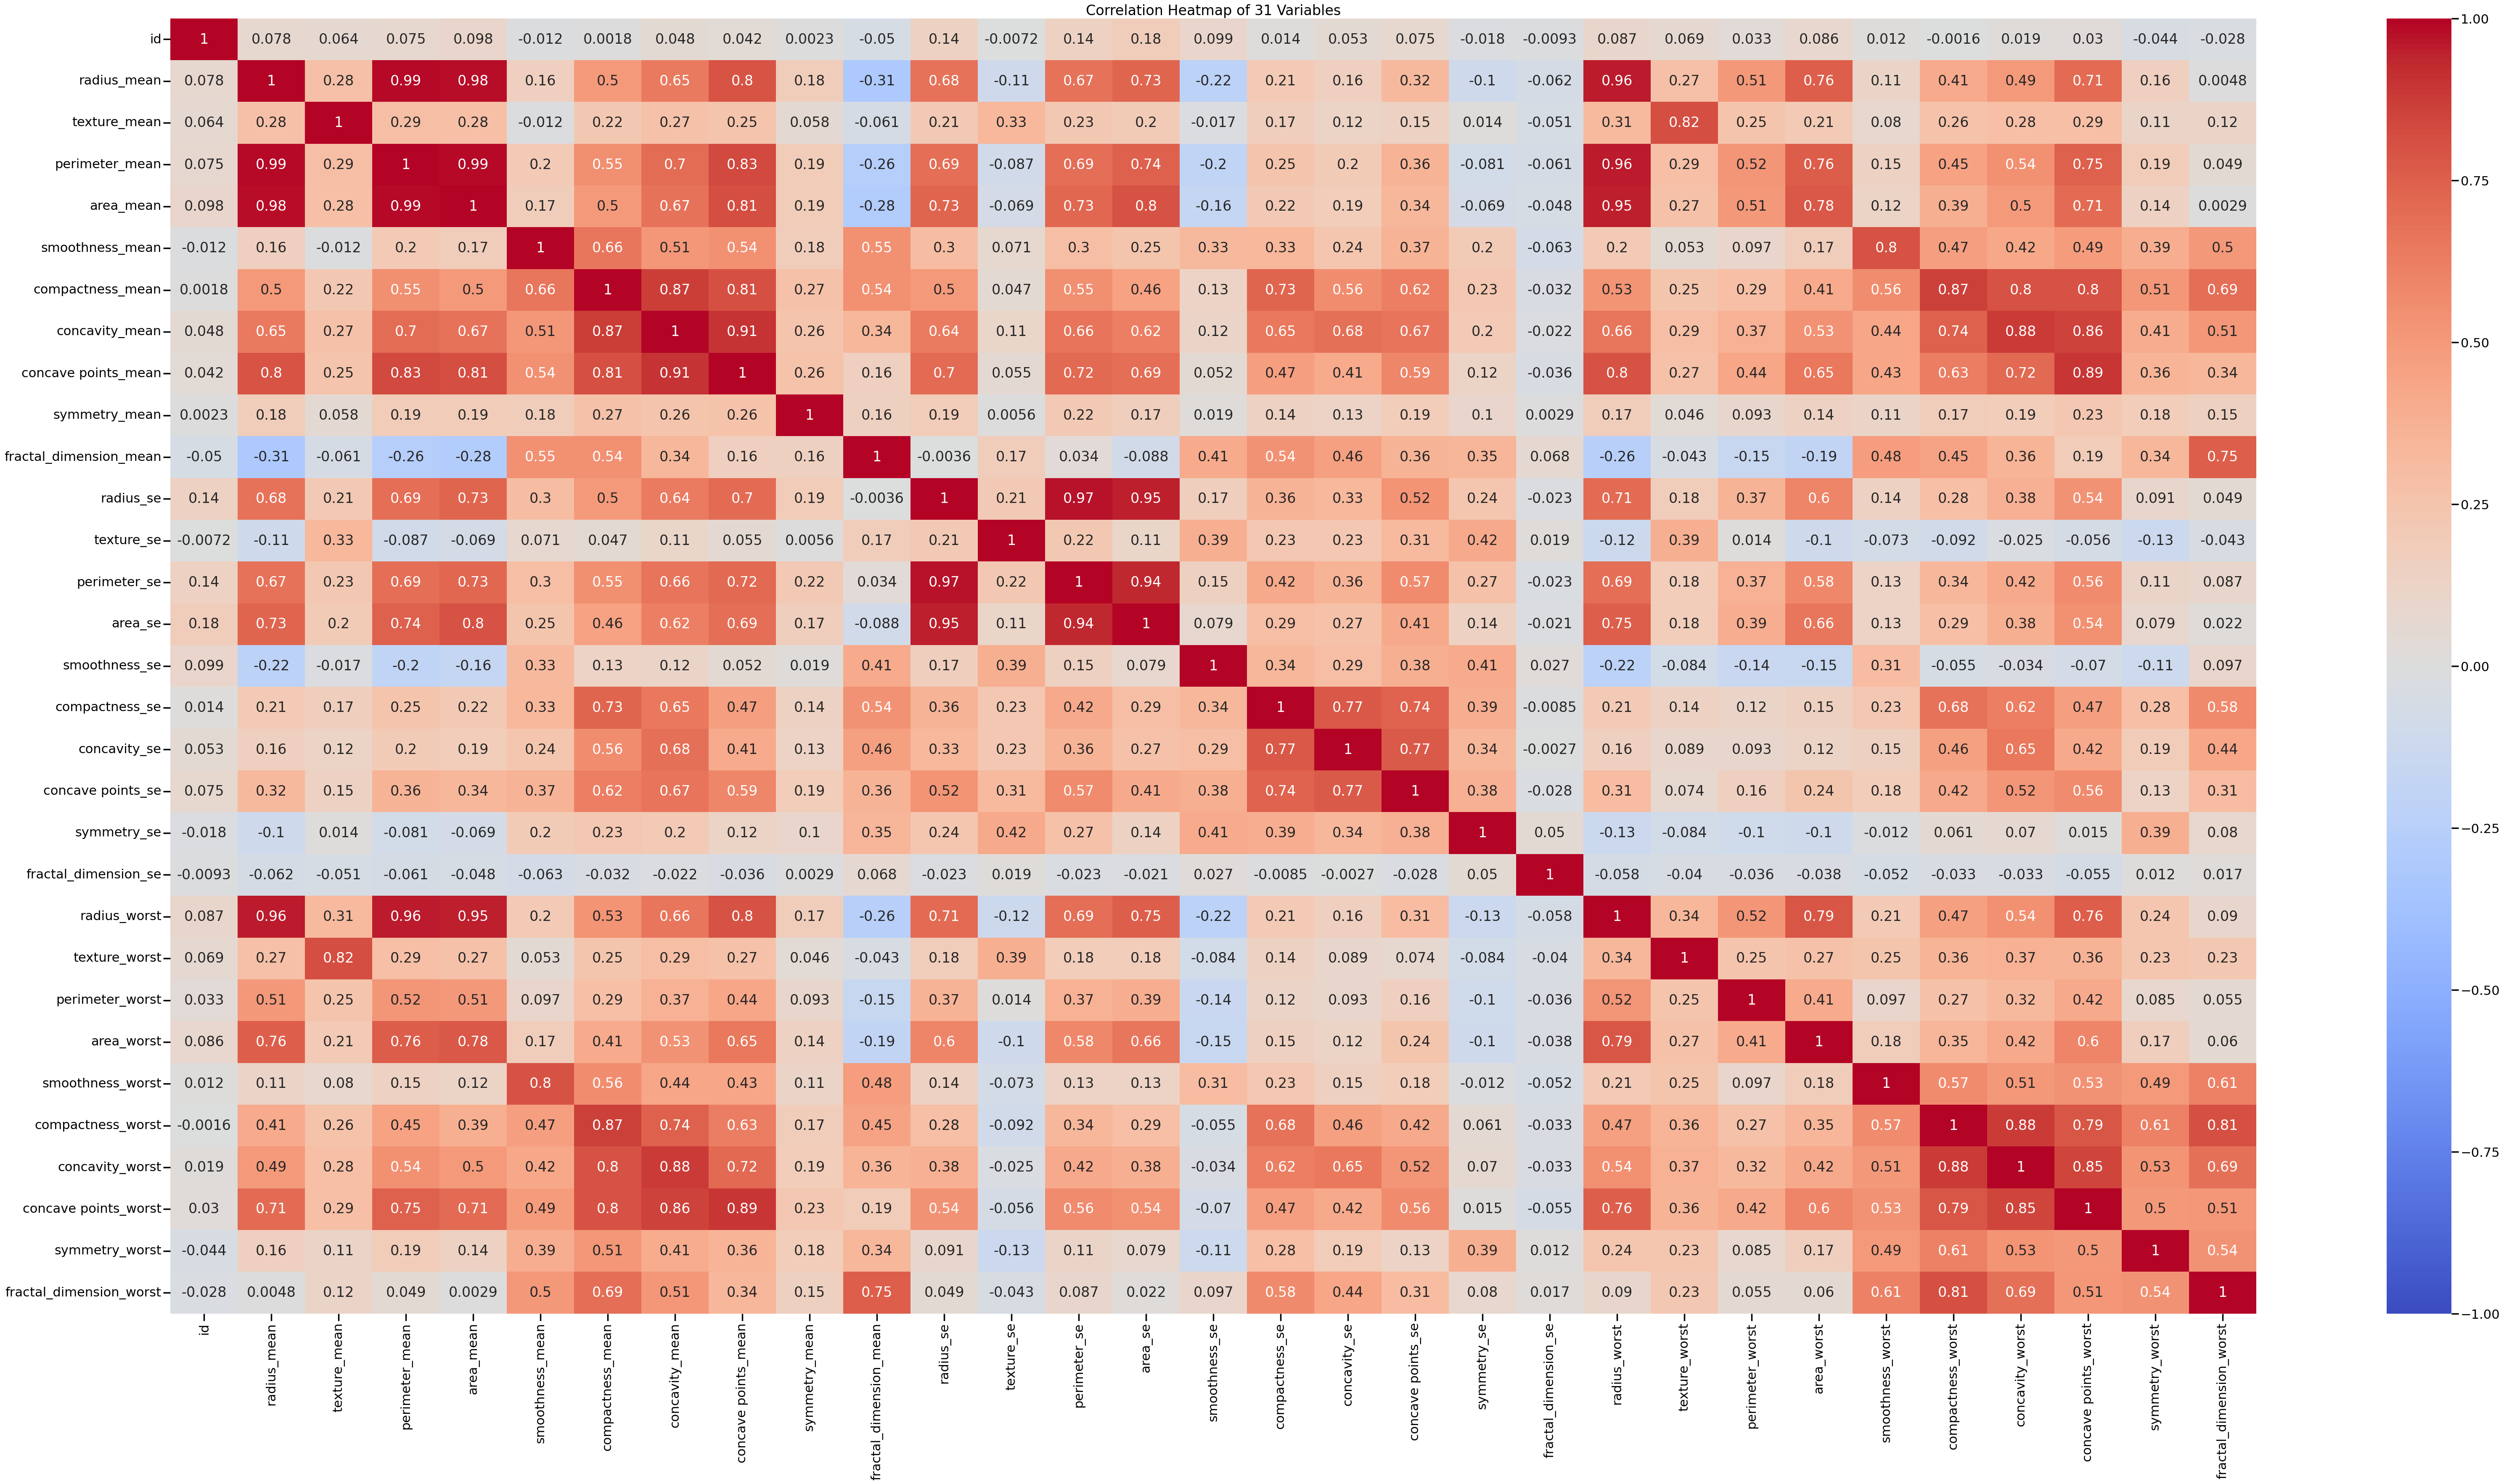

In [252]:
# Draw the heatmap with the correct aspect ratio
corr = result_filled.corr()
plt.figure(figsize=(80, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of 31 Variables")
plt.show()

### Looking for Correlation

In [253]:
#identifies features that have a correlation coefficient greater than threshold 70%
def correlation(result_filled, threshold):
    col_corr = set()
    corr_matrix = result_filled.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(result_filled, 0.7)
len(set(corr_features))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3800\716501339.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = result_filled.corr()


18

### Feature Selection

In [254]:
#dropping highly correlated features
result_updated = result_filled.drop(corr_features, axis=1)
result_updated

id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0      842302.0         M        17.99         10.38          0.11840   
1      842517.0         M        20.57         17.77          0.08474   
2    84300903.0         M        19.69         21.25          0.10960   
3    84348301.0         M        11.42         20.38          0.14250   
4    84358402.0         M        20.29         14.34          0.10030   
..          ...       ...          ...           ...              ...   
565    926424.0         M        21.56         22.39          0.11100   
566    926682.0         M        20.13         28.25          0.09780   
567    926954.0         M        16.60         28.08          0.08455   
568    927241.0         M        20.60         29.33          0.11780   
569     92751.0         B         7.76         24.54          0.05263   

     compactness_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0             0.27760         0.2419                 0.07871      0.9053   
1             0.07864         0.1812                 0.05667      0.7339   
2             0.15990         0.2069                 0.05999      0.7869   
3             0.28390         0.2597                 0.09744      1.1560   
4             0.13280         0.1809                 0.05883      0.7813   
..                ...            ...                     ...         ...   
565           0.11590         0.1726                 0.05623      1.2560   
566           0.10340         0.1752                 0.05533      2.4630   
567           0.10230         0.1590                 0.05648      1.0750   
568           0.27700         0.2397                 0.06155      1.5950   
569           0.04362         0.1587                 0.05884      1.4280   

     smoothness_se  symmetry_se  fractal_dimension_se  perimeter_worst  \
0         0.006399      0.03003              0.006193           184.60   
1         0.005225      0.01389              0.003532           158.80   
2         0.006150      0.02250              0.004571           152.50   
3         0.009110      0.05963              0.009208            98.87   
4         0.011490      0.01756              0.005115           152.20   
..             ...          ...                   ...              ...   
565       0.010300      0.01114              0.004239           166.10   
566       0.005769      0.01898              0.002498           155.00   
567       0.005903      0.01318              0.003892           126.70   
568       0.006522      0.02324              0.006185           184.60   
569       0.007189      0.02676              0.002783            59.16   

     symmetry_worst  
0            0.4601  
1            0.2750  
2            0.3613  
3            0.6638  
4            0.2364  
..              ...  
565          0.2060  
566          0.2572  
567          0.2218  
568          0.4087  
569          0.2871  

[566 rows x 14 columns]

## Label Encoding on Categorical Variable

In [255]:
from sklearn.preprocessing import LabelEncoder
#encoding the categorical labels in the 'diagnosis' column of diagnosis into numerical values.
lb = LabelEncoder()
result_updated['diagnosis'] = lb.fit_transform(result_updated.diagnosis)

In [256]:
result_updated['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
565    1
566    1
567    1
568    1
569    0
Name: diagnosis, Length: 566, dtype: int32

## Assigning features to X and y

In [257]:
#dropping diagnosis and id 
X = result_updated.drop(['diagnosis', 'id'], axis=1)
X

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
565        21.56         22.39          0.11100           0.11590   
566        20.13         28.25          0.09780           0.10340   
567        16.60         28.08          0.08455           0.10230   
568        20.60         29.33          0.11780           0.27700   
569         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  texture_se  smoothness_se  \
0           0.2419                 0.07871      0.9053       0.006399   
1           0.1812                 0.05667      0.7339       0.005225   
2           0.2069                 0.05999      0.7869       0.006150   
3           0.2597                 0.09744      1.1560       0.009110   
4           0.1809                 0.05883      0.7813       0.011490   
..             ...                     ...         ...            ...   
565         0.1726                 0.05623      1.2560       0.010300   
566         0.1752                 0.05533      2.4630       0.005769   
567         0.1590                 0.05648      1.0750       0.005903   
568         0.2397                 0.06155      1.5950       0.006522   
569         0.1587                 0.05884      1.4280       0.007189   

     symmetry_se  fractal_dimension_se  perimeter_worst  symmetry_worst  
0        0.03003              0.006193           184.60          0.4601  
1        0.01389              0.003532           158.80          0.2750  
2        0.02250              0.004571           152.50          0.3613  
3        0.05963              0.009208            98.87          0.6638  
4        0.01756              0.005115           152.20          0.2364  
..           ...                   ...              ...             ...  
565      0.01114              0.004239           166.10          0.2060  
566      0.01898              0.002498           155.00          0.2572  
567      0.01318              0.003892           126.70          0.2218  
568      0.02324              0.006185           184.60          0.4087  
569      0.02676              0.002783            59.16          0.2871  

[566 rows x 12 columns]

### Histogram Visualization on X Features

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'symmetry_se'}>],
       [<Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'perimeter_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>]], dtype=object)

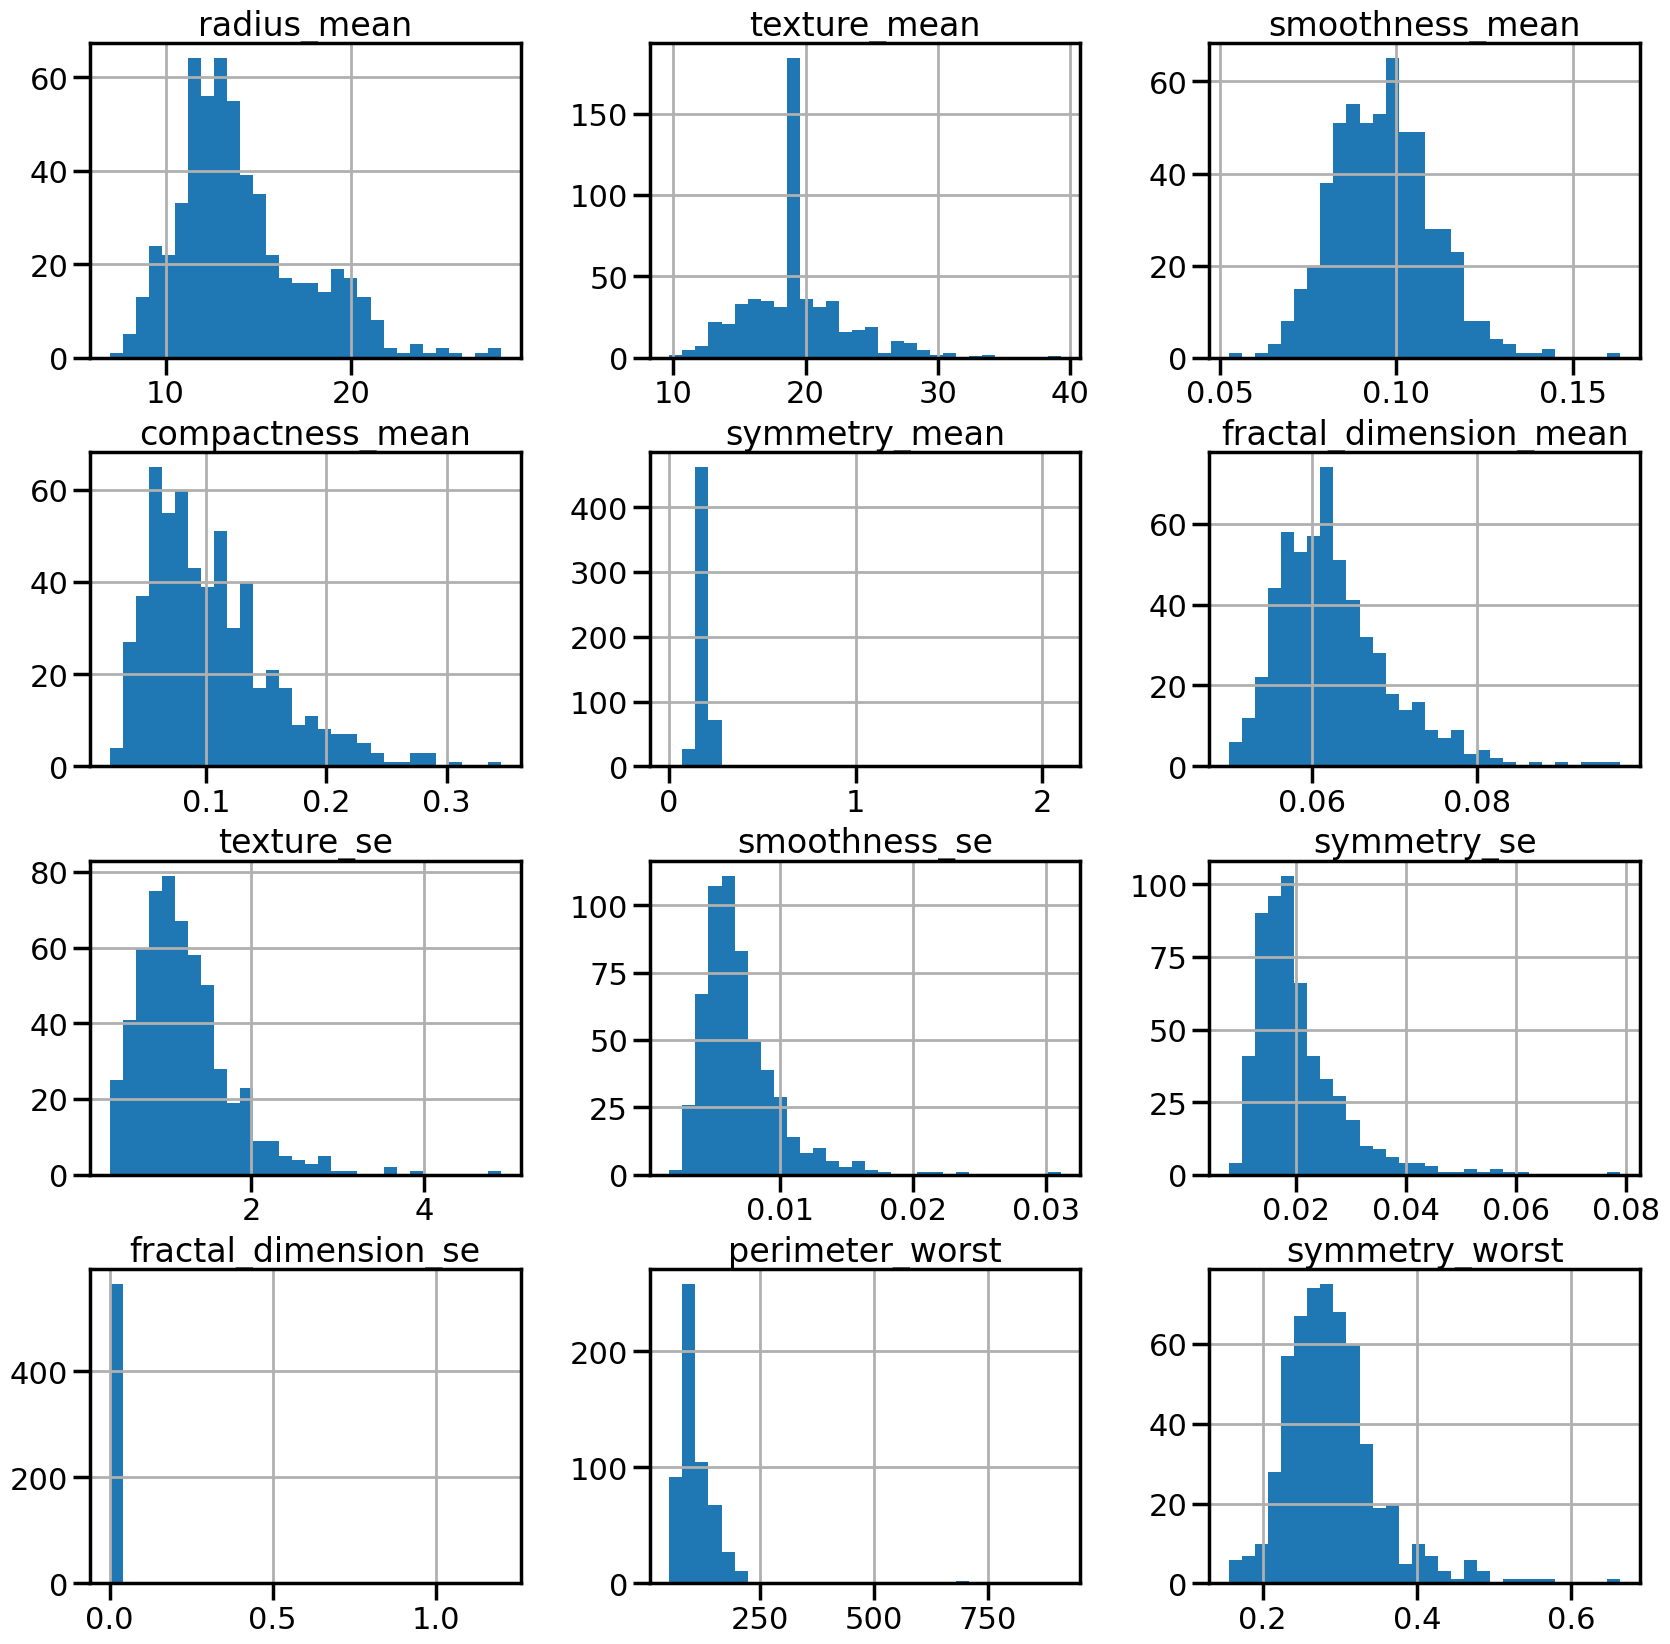

In [258]:
#Histogram plot for X
X.hist(bins = 30, figsize = (20, 20))

In [259]:
#assigns diagnosis to the variable y (Target Variable)
y = result_updated['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
565    1
566    1
567    1
568    1
569    0
Name: diagnosis, Length: 566, dtype: int32

### Histogram Visualization on y Features

<Axes: >

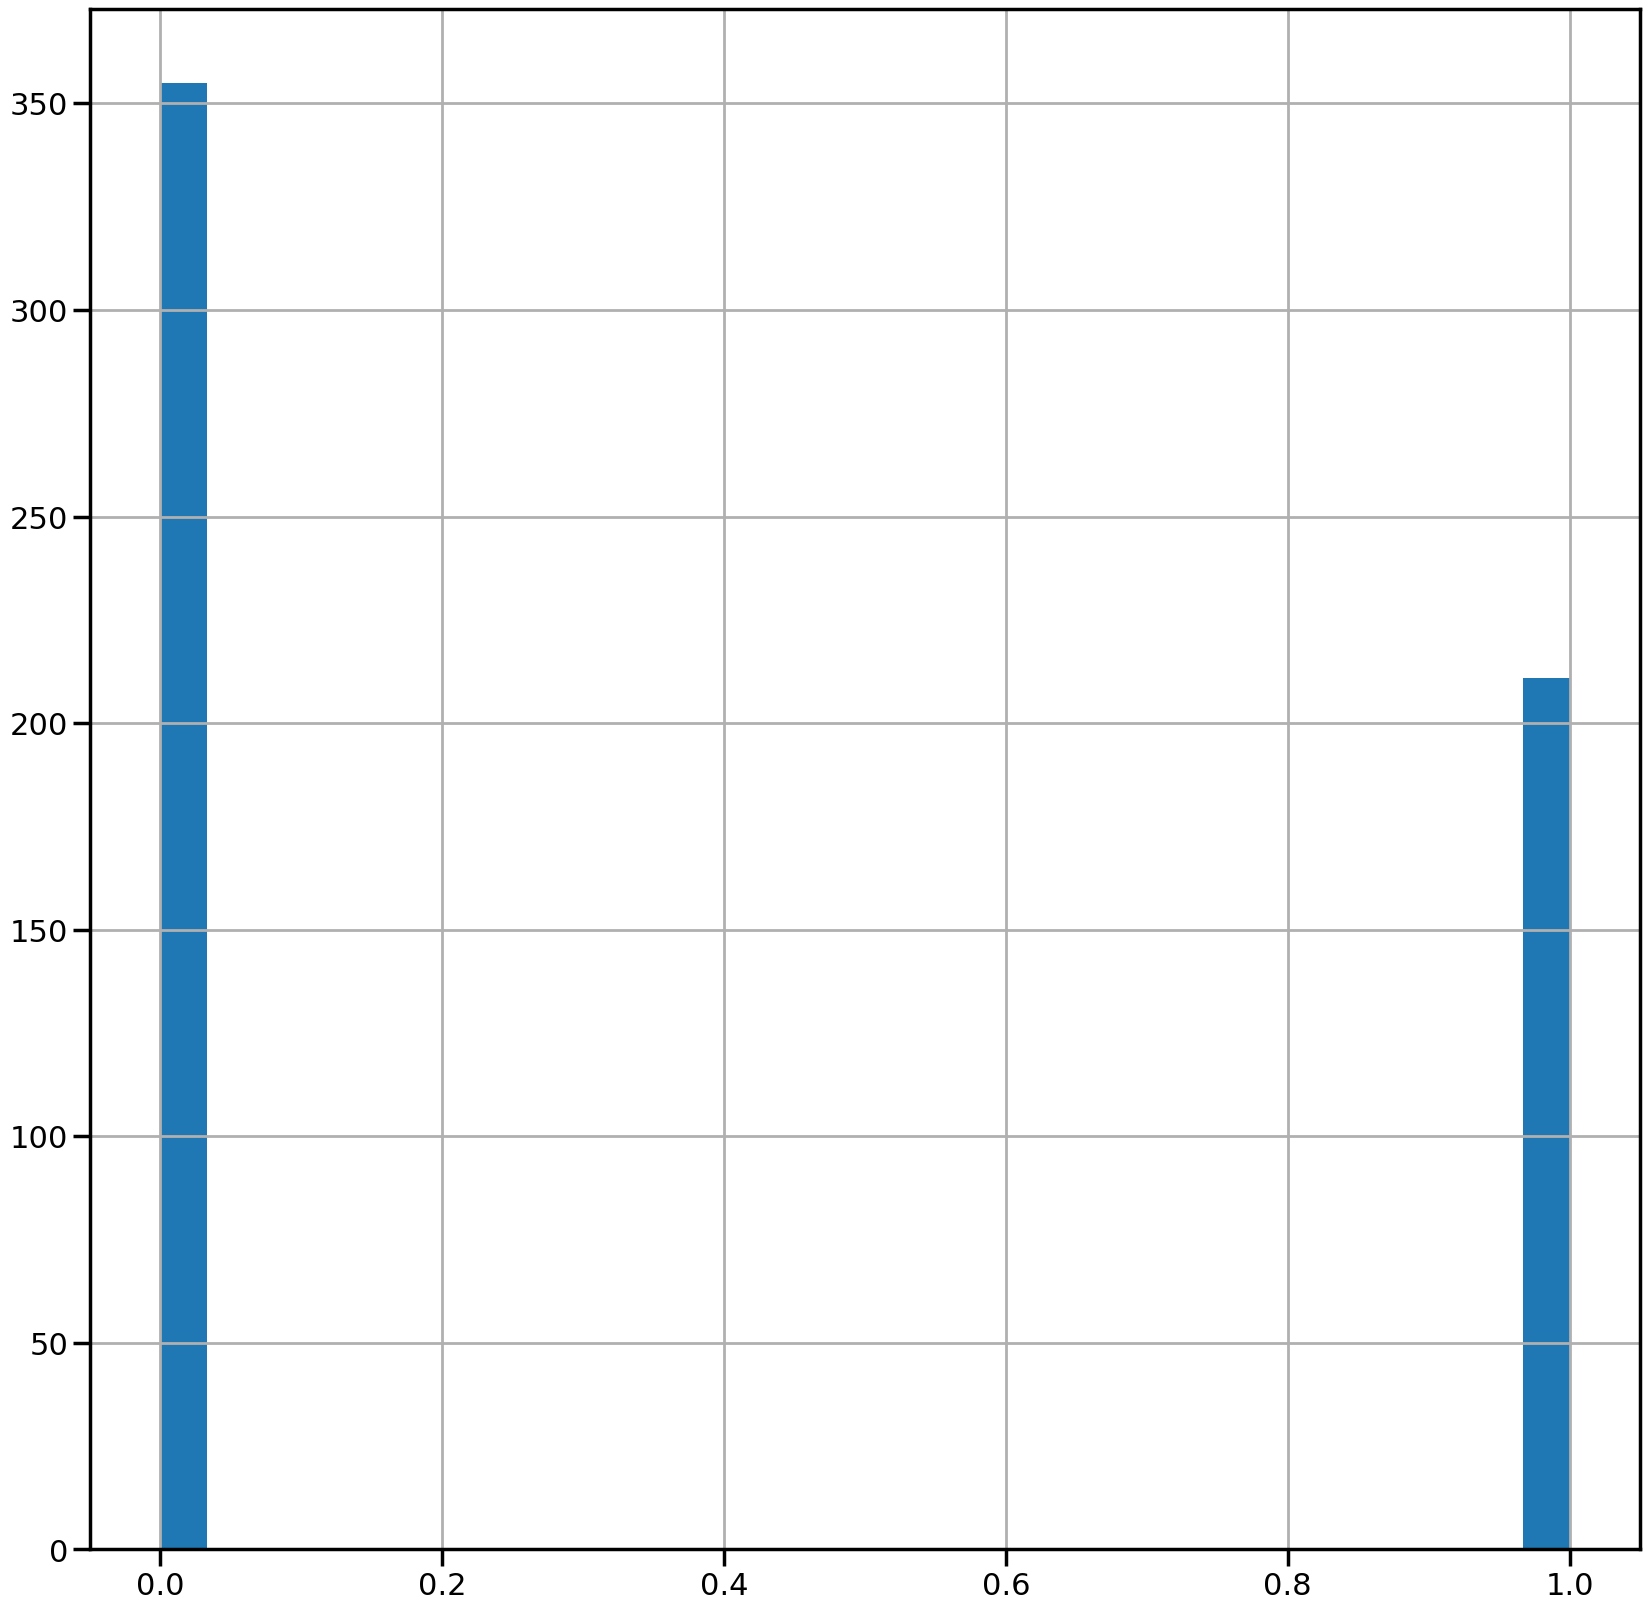

In [260]:
#Histogram plot for y
y.hist(bins = 30, figsize = (20, 20))

## Splitting the Data into Training and Test set

In [261]:
# Perform the test-train split, creating four new variablels,the training and test set for X and y. 
# Setting random at 42 for identical output at every run
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [262]:
X_train

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
108       22.270         19.67          0.13260           0.27680   
228       12.620         23.97          0.07903           0.07529   
569        7.760         24.54          0.05263           0.04362   
432       20.180         18.91          0.11330           0.14890   
413       14.990         18.91          0.08515           0.10250   
..           ...           ...              ...               ...   
71         8.888         14.64          0.09783           0.15310   
106       11.640         18.33          0.11420           0.10170   
273        9.742         15.67          0.09037           0.04689   
438       13.850         19.60          0.08684           0.06330   
102       12.180         20.52          0.08013           0.04038   

     symmetry_mean  fractal_dimension_mean  texture_se  smoothness_se  \
108         0.2556                 0.07039      1.5450       0.006515   
228         0.1514                 0.06019      1.0660       0.005169   
569         0.1587                 0.05884      1.4280       0.007189   
432         0.1724                 0.06053      1.0010       0.009087   
413         0.1944                 0.05913      1.3360       0.004449   
..             ...                     ...         ...            ...   
71          0.1902                 0.08980      0.8522       0.017210   
106         0.1801                 0.06520      1.6570       0.008540   
273         0.2081                 0.06312      1.4090       0.013800   
438         0.1555                 0.05673      1.6780       0.005836   
102         0.1739                 0.05677      1.5710       0.005080   

     symmetry_se  fractal_dimension_se  perimeter_worst  symmetry_worst  
108      0.03112              0.005037           206.80          0.4055  
228      0.01365              0.003407            90.67          0.2826  
569      0.02676              0.002783            59.16          0.2871  
432      0.02451              0.004005           146.00          0.3032  
413      0.01906              0.004015           110.20          0.3163  
..           ...                   ...              ...             ...  
71       0.02541              0.021930            62.56          0.2254  
106      0.01565              0.003840            85.51          0.2806  
273      0.01798              0.004261            68.09          0.2841  
438      0.02014              0.002326           100.90          0.2513  
102      0.01447              0.001532            84.58          0.2694  

[424 rows x 12 columns]

In [263]:
X_test

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
543       14.740         25.42          0.08275           0.07214   
528       12.340         18.91          0.09003           0.06307   
234        9.567         15.91          0.08464           0.04087   
529       13.940         18.91          0.12480           0.09755   
492       18.010         18.91          0.10010           0.12890   
..           ...           ...              ...               ...   
54        15.100         22.02          0.09056           0.07081   
184       15.280         22.41          0.09057           0.10520   
46         8.196         16.84          0.08600           0.05943   
93        13.450         18.30          0.10220           0.08165   
338       10.050         17.53          0.10070           0.07326   

     symmetry_mean  fractal_dimension_mean  texture_se  smoothness_se  \
543         0.1840                 0.05680      1.3850       0.004775   
528         0.1689                 0.05808      0.4957       0.003681   
234         0.1551                 0.06403      0.8301       0.011640   
529         0.1976                 0.06457      2.6350       0.010040   
492         0.2116                 0.06077      1.2880       0.007997   
..             ...                     ...         ...            ...   
54          0.1616                 0.05684      0.8339       0.004675   
184         0.1727                 0.06317      0.4956       0.003290   
46          0.1769                 0.06503      0.9567       0.006356   
93          0.1638                 0.05710      1.3730       0.005884   
338         0.1890                 0.06331      2.0150       0.007803   

     symmetry_se  fractal_dimension_se  perimeter_worst  symmetry_worst  
543      0.01870              0.002626           107.40          0.2722  
528      0.01129              0.001366            87.22          0.3110  
234      0.02383              0.003540            65.74          0.2757  
529      0.01715              0.005528            94.52          0.2160  
492      0.02897              0.003996           143.40          0.3251  
..           ...                   ...              ...             ...  
54       0.01095              0.001629           117.70          0.2675  
184      0.01172              0.002575           113.80          0.3175  
46       0.02574              0.002582            57.26          0.3105  
93       0.01884              0.001817            97.59          0.2678  
338      0.02100              0.002778            71.98          0.2894  

[142 rows x 12 columns]

## Feature Scaling Using Min-Max scaling

In [264]:
#Transforming features using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [265]:
X_train_scaled

array([[0.71345861, 0.33682787, 0.72194638, ..., 0.00419733, 0.17545115,
        0.49083383],
       [0.23997841, 0.48224552, 0.23833168, ..., 0.002839  , 0.03928098,
        0.24857087],
       [0.00152102, 0.50152181, 0.        , ..., 0.002319  , 0.00233341,
        0.25744136],
       ...,
       [0.09876846, 0.20155563, 0.34070597, ..., 0.00355067, 0.01280443,
        0.2515277 ],
       [0.30032874, 0.3344606 , 0.30883813, ..., 0.00193817, 0.05127634,
        0.18687167],
       [0.21838968, 0.36557322, 0.24826216, ..., 0.0012765 , 0.03214005,
        0.22255076]])

In [266]:
X_test_scaled

array([[3.43996860e-01, 5.31281704e-01, 2.71914778e-01, ...,
        2.18816703e-03, 5.88980219e-02, 2.28070175e-01],
       [2.26240126e-01, 3.11126141e-01, 3.37636544e-01, ...,
        1.13816686e-03, 3.52356273e-02, 3.04553519e-01],
       [9.01820323e-02, 2.09671965e-01, 2.88977160e-01, ...,
        2.94983382e-03, 1.00488960e-02, 2.34969446e-01],
       ...,
       [2.29134979e-02, 2.41122760e-01, 3.01254852e-01, ...,
        2.15150036e-03, 1.05530997e-04, 3.03567909e-01],
       [2.80702615e-01, 2.90497125e-01, 4.47503837e-01, ...,
        1.51400025e-03, 4.73951432e-02, 2.19396807e-01],
       [1.13880575e-01, 2.64457220e-01, 4.33962264e-01, ...,
        2.31483372e-03, 1.73657118e-02, 2.61975163e-01]])

In [267]:
#obtaining the minimum and maximum values for the first column of X_train and X_test
X_train_scaled[:, 1].min()

0.0

In [268]:
X_train_scaled[:, 1].max()

1.0

In [269]:
X_test_scaled[:, 1].min()

0.022658099425092948

In [270]:
X_test_scaled[:, 1].max()

0.7105174163003043

## Data Transformation

In [334]:
from scipy.stats import boxcox
# Apply Box-Cox transformation to X_train_scaled
X_train_boxcox = np.zeros_like(X_train_scaled)
lambdas_train = []

for i in range(X_train_scaled.shape[1]):
    X_train_boxcox[:, i], lmbda = boxcox(X_train_scaled[:, i] + 1)  # Adding 1 to handle zero and negative values
    lambdas_train.append(lmbda)

# Apply Box-Cox transformation to X_test_scaled using lambdas from X_train_scaled
X_test_boxcox = np.zeros_like(X_test_scaled)

for i in range(X_test_scaled.shape[1]):
    X_test_boxcox[:, i] = boxcox(X_test_scaled[:, i] + 1, lmbda=lambdas_train[i])  # Adding 1 to handle zero and negative values


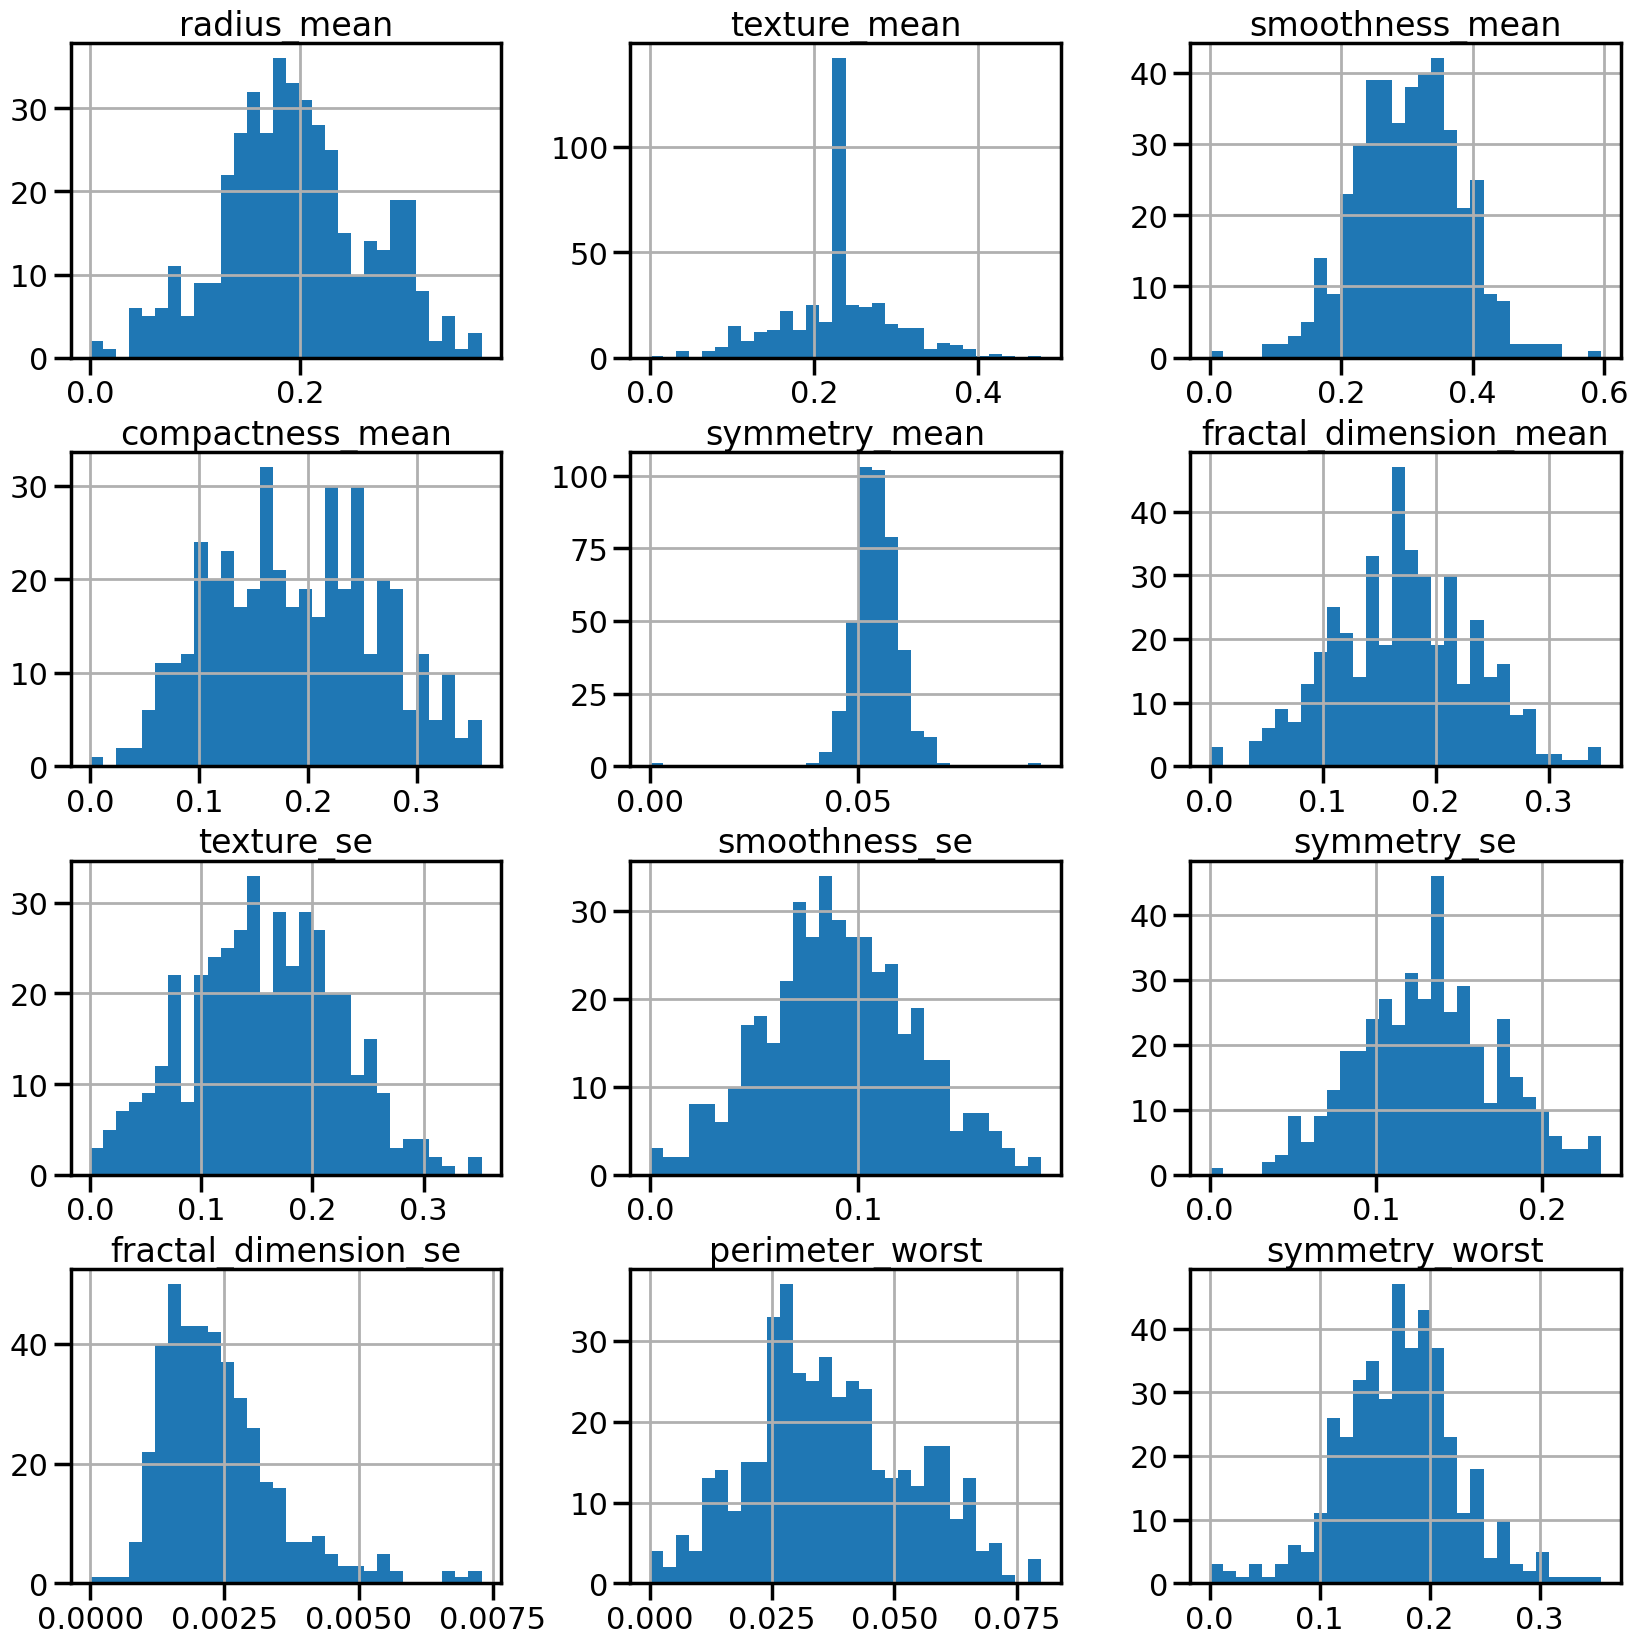

In [272]:
# Convert NumPy array to DataFrame
X_train_boxcox_df = pd.DataFrame(X_train_boxcox, columns=X_train.columns)

# Plot histograms
X_train_boxcox_df.hist(bins=30, figsize=(20, 20))
plt.show()

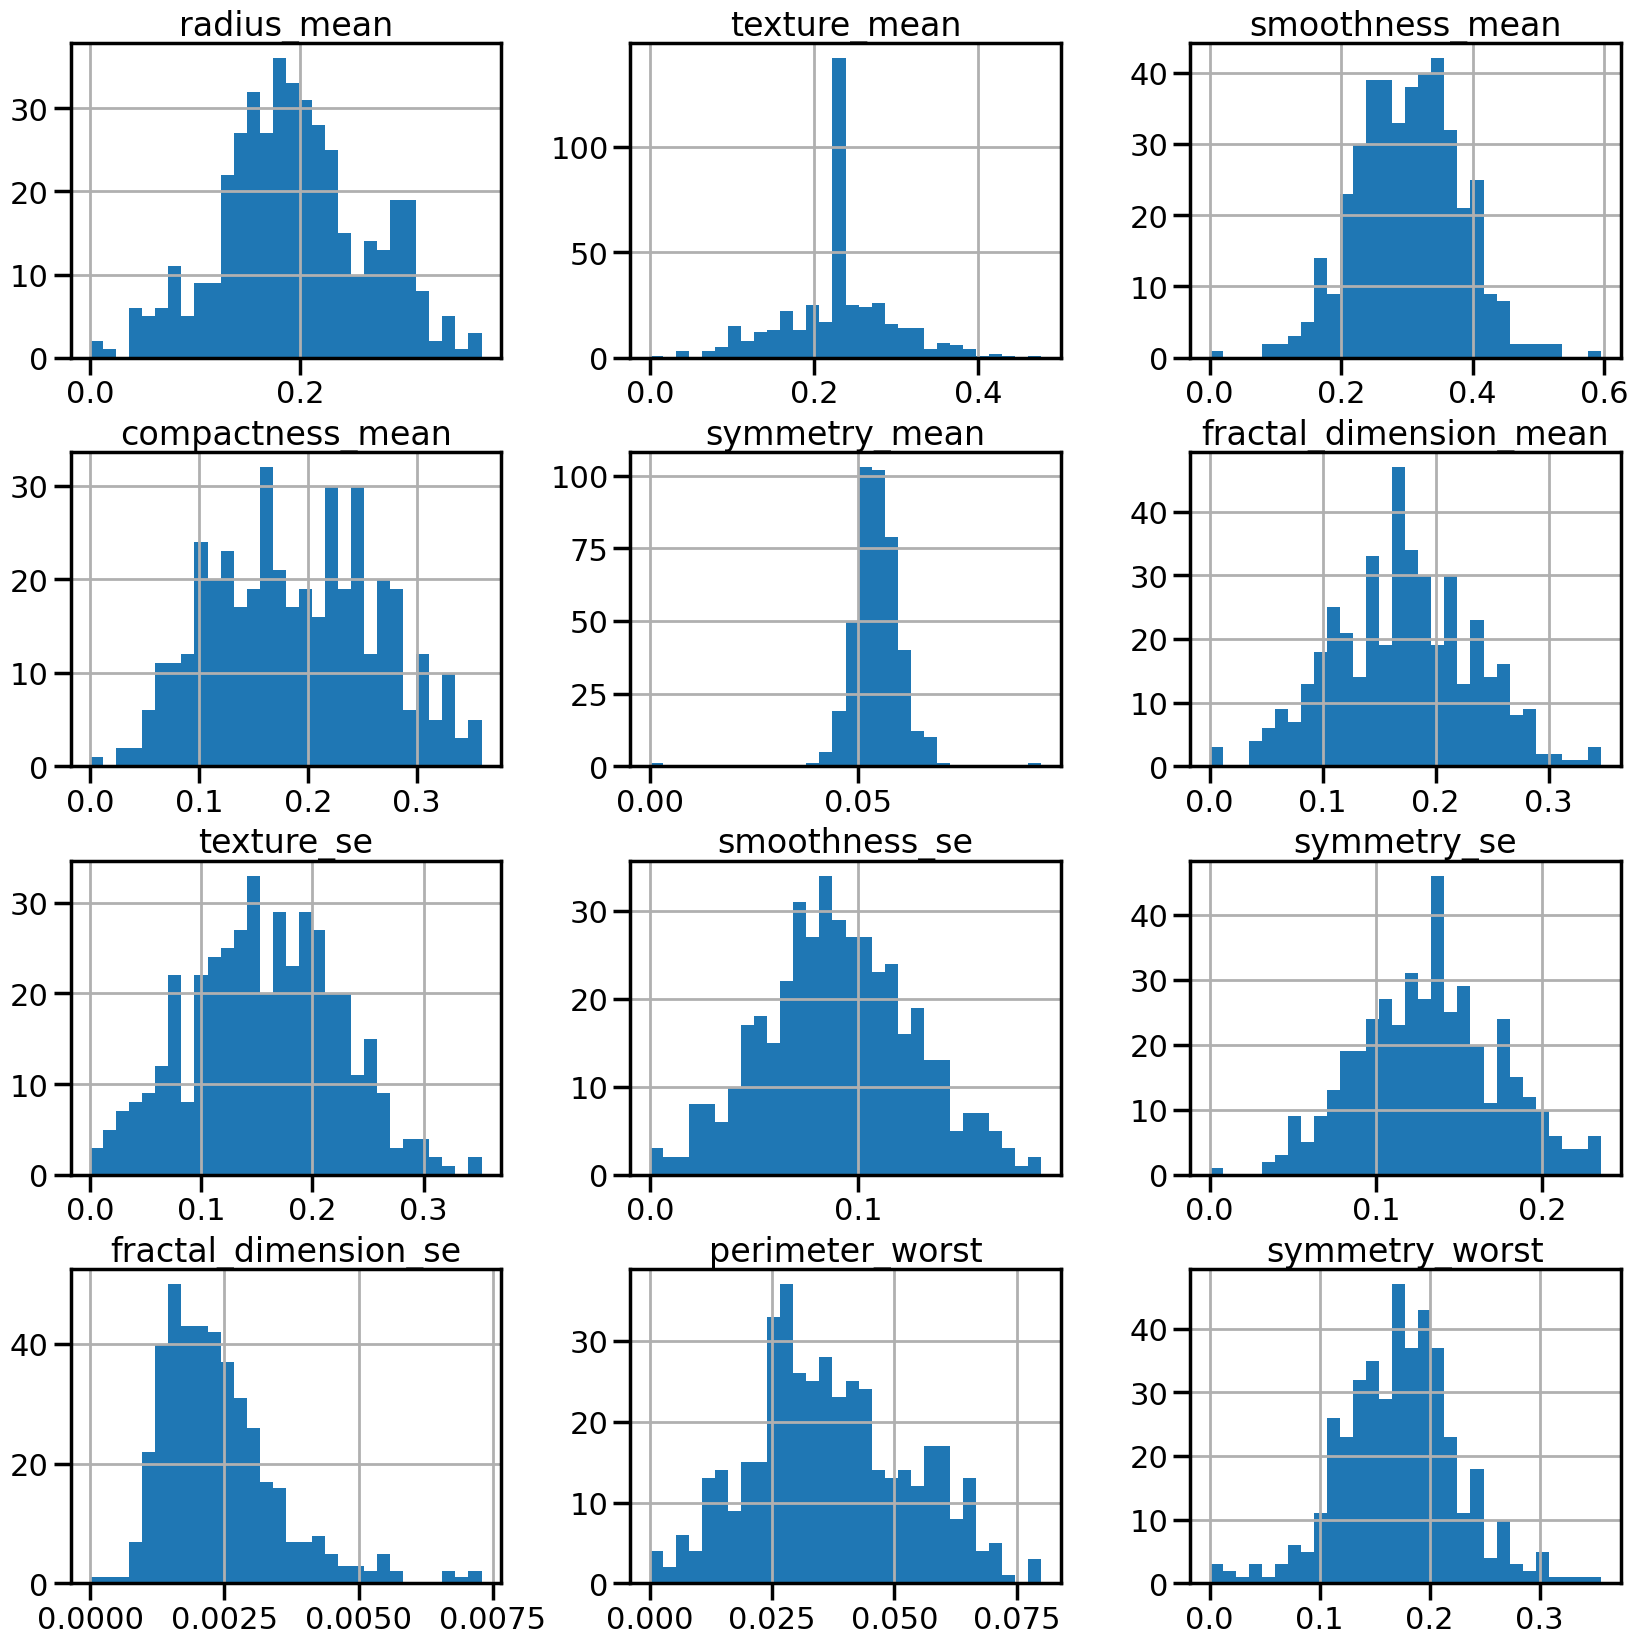

In [273]:
# Convert NumPy array to DataFrame
X_test_boxcox_df = pd.DataFrame(X_train_boxcox, columns=X_train.columns)

# Plot histograms
X_test_boxcox_df.hist(bins=30, figsize=(20, 20))
plt.show()

# Exploratory Data Analysis and Feature Engineering

### Introduction
In this task, I explored and preprocess a dataset containing information about breast cancer tumors. The aim of this task is to build a predictive model to classify tumors as either benign or malignant based on various features.

### Data Loading and Cleaning
I began by loading my dataset, then went ahead to clean my data. I noticed there were duplictes in my dataset, which I handled, I  also noticed missing values, such as -999 and 0 and empty spaces, which I treated by first replacing -999 and 0 with NaN rather than dropping the rows so as not to lose so much information from the data. I went ahed to fill Nan with median values to retain information. 

### Feature Engineering Techniques
#### Correlation Analysis
I conducted correlation analysis to identify relationships between different features in the dataset. By visualizing the correlation matrix using a heatmap, we gain insights into which features are highly correlated with each other.

### Feature Selection
Based on the correlation analysis results, I decided to drop highly correlated features to avoid multicollinearity issues in our predictive model. This helps streamline the feature set and improves model interpretability. After dropping I was left with 12 features on my X dataset.

### Data Preprocessing
#### Label Encoding
My target variable being a categorical variable, I encode it using label encoding to convert it into a numerical format suitable for machine learning algorithms. Label encoding was used due to having just 2 features for my target variable.

#### Splitting Data
I splitted the dataset into training and testing sets to evaluate the performance of my models.

### Feature Scaling
To ensure that all features contribute equally to the model fitting process, I scaled the features using the Min-Max Scaler and all fell betwen 0 and 1.

### Box-Cox Transformation
I applied the Box-Cox transformation to handle non-normality in the data and improve the performance of my models.


# UNSUPERVISED

## K-Means Clustering

In [437]:
# Making copies of X and Y to retain the original data
X5 = np.copy(X)
y5 = np.copy(y)

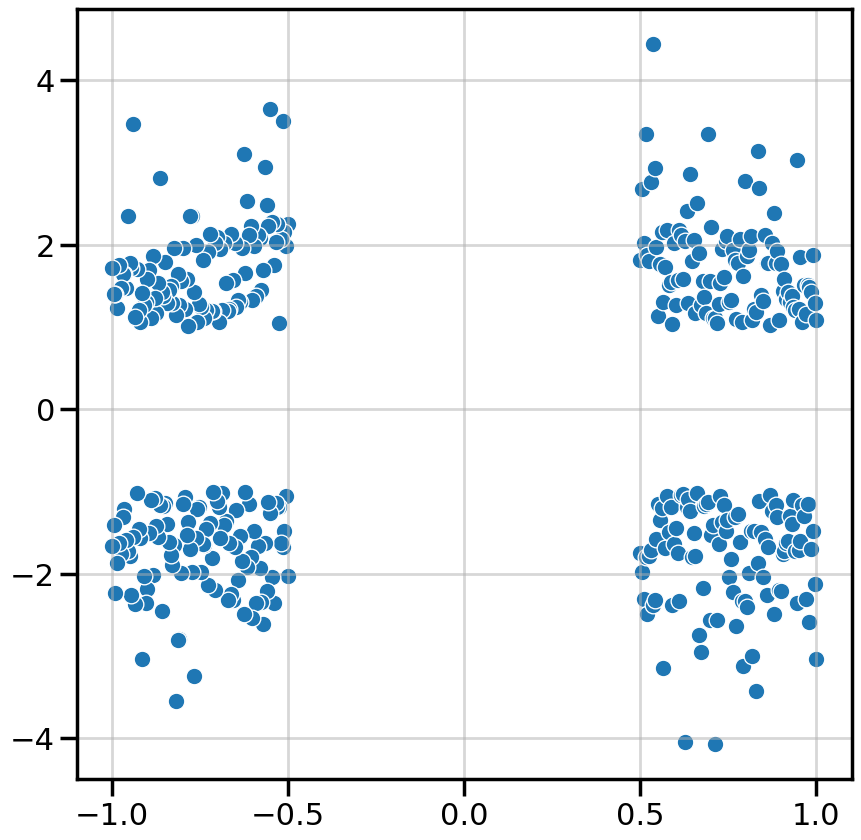

In [438]:
# This code generates synthetic data points and then creates a scatter plot
X51 = np.linspace(0.5, 1, 100)
X52 = np.linspace(-0.5, -1, 100)
X53 = np.linspace(0.5, 1, 100)
X54 = np.linspace(-0.5, -1, 100)

y51 = abs(np.random.randn(100) / 1) + 1
y52 = abs(np.random.randn(100) / 1) + 1
y53 = abs(np.random.randn(100) / 1) * -1 - 1
y54 = abs(np.random.randn(100) / 1) * -1 - 1

X5 = np.array(X51)
X5 = np.append(X5, X52)
X5 = np.append(X5, X53)
X5 = np.append(X5, X54)

y5 = np.array(y51)
y5 = np.append(y5, y52)
y5 = np.append(y5, y53)
y5 = np.append(y5, y54)

plt.figure(figsize=(10,10))
sns.set_context('poster')
sns.scatterplot(data=None, x=X5, y=y5)
plt.grid(alpha=0.5)

In [439]:
# Transforming into a 2D array where each row represents a data point with two features
X5.reshape(400, 1)
y5.reshape(400, 1)
X5 = np.stack((X5, y5), axis=1)

In [440]:
# Transforming X5 using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scaled_df = min_max_scaler.fit_transform(X5)


In [441]:
from sklearn.cluster import KMeans
# Performs K-means clustering
k_means = KMeans(n_clusters=4)
k_means.fit(X_scaled_df)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4)

In [279]:
# Predict the cluster labels for each data point in the dataset 
y_pred = k_means.predict(X_scaled_df)

### Scatter Plot for Visualization

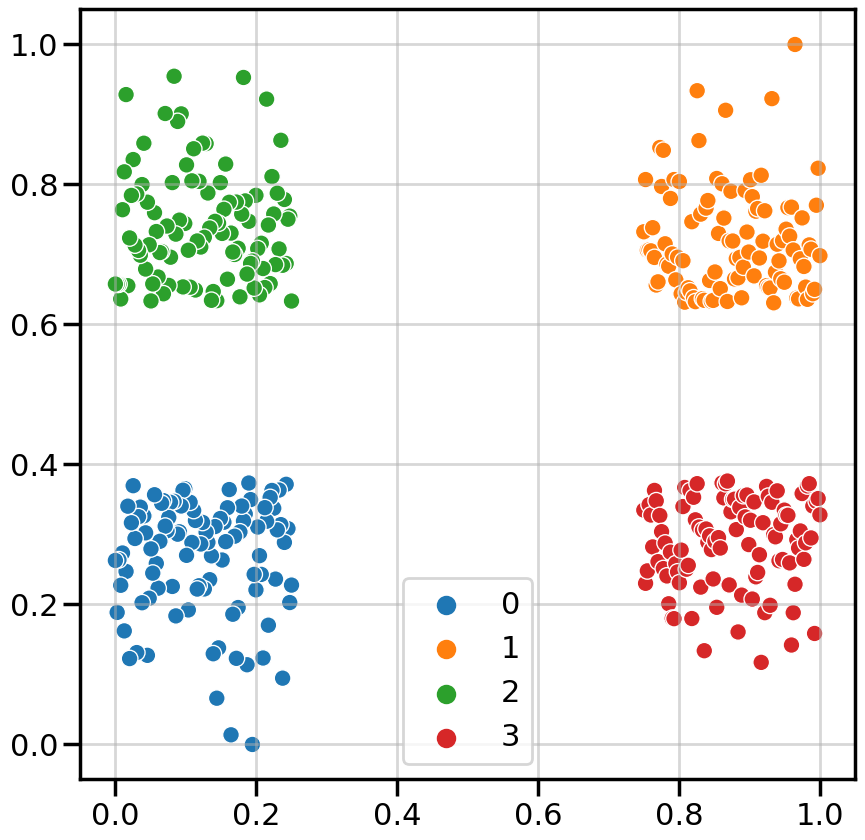

In [280]:
# Creating a scatter plot to visualize the clustering results
plt.figure(figsize=(10,10))
sns.set_context('poster')
sns.scatterplot(data=None, x=X_scaled_df[:,0],
               y=X_scaled_df[:,1],
               hue=y_pred,
               palette='tab10')
plt.grid(alpha=0.5)

### Inertia and the Elbow Method 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

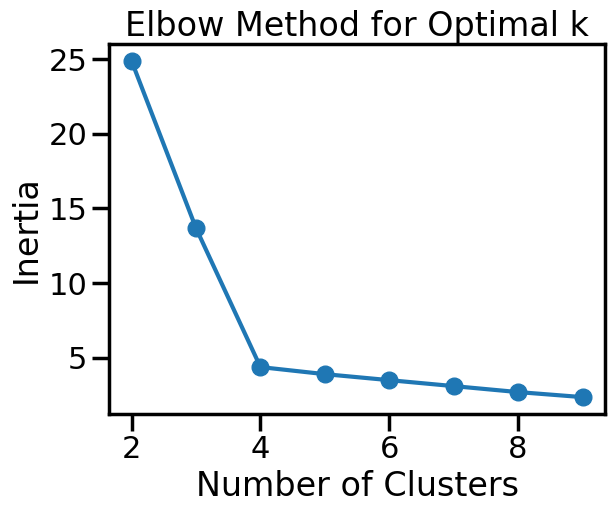

In [281]:
# Using elbow method to determine the optimal number of clusters (k) for KMeans clustering.
inertia = []
for i in range(2, 10):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X_scaled_df)
    inertia.append(k_means.inertia_)

# Plotting the inertia values
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Silhoutte Score

In [282]:
from sklearn.metrics import silhouette_score
# Calculating silhouette scores for different numbers of clusters (k) using the KMeans clustering algorithm
silhouette_scores = []
for i in range(2, 10):
    k_means = KMeans(n_clusters=i, n_init=10)
    k_means.fit(X_scaled_df)
    silhouette_scores.append(silhouette_score(X_scaled_df, k_means.labels_))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

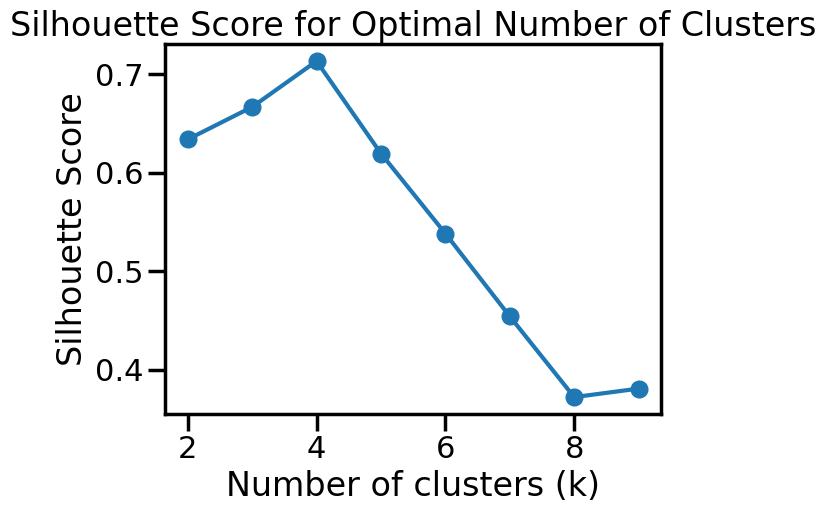

In [283]:
# Plotting the silhouette scores against the number of clusters (k) to help identify the optimal number of clusters for the dataset
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

## Performance Metric on K-Means Clustering

In [284]:
# Evaluating Metrics
# Find the number of clusters with the highest silhouette score
best_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because range starts from 2
print("Best number of clusters:", best_num_clusters)
print("Best silhouette score:", max(silhouette_scores))
avg_silhouette_score = np.mean(silhouette_scores)
print("Average silhouette score across all iterations:", avg_silhouette_score)


Best number of clusters: 4
Best silhouette score: 0.7134144738330409
Average silhouette score across all iterations: 0.5474515389366688


## Hierarchical Agglomerative Clustering

In [285]:
from sklearn.cluster import AgglomerativeClustering
# performs hierarchical agglomerative clustering 
agg_clustering = AgglomerativeClustering(linkage='ward')
agg_clustering.fit(X_scaled_df)

AgglomerativeClustering()

### Dendogram showing different types of linkage

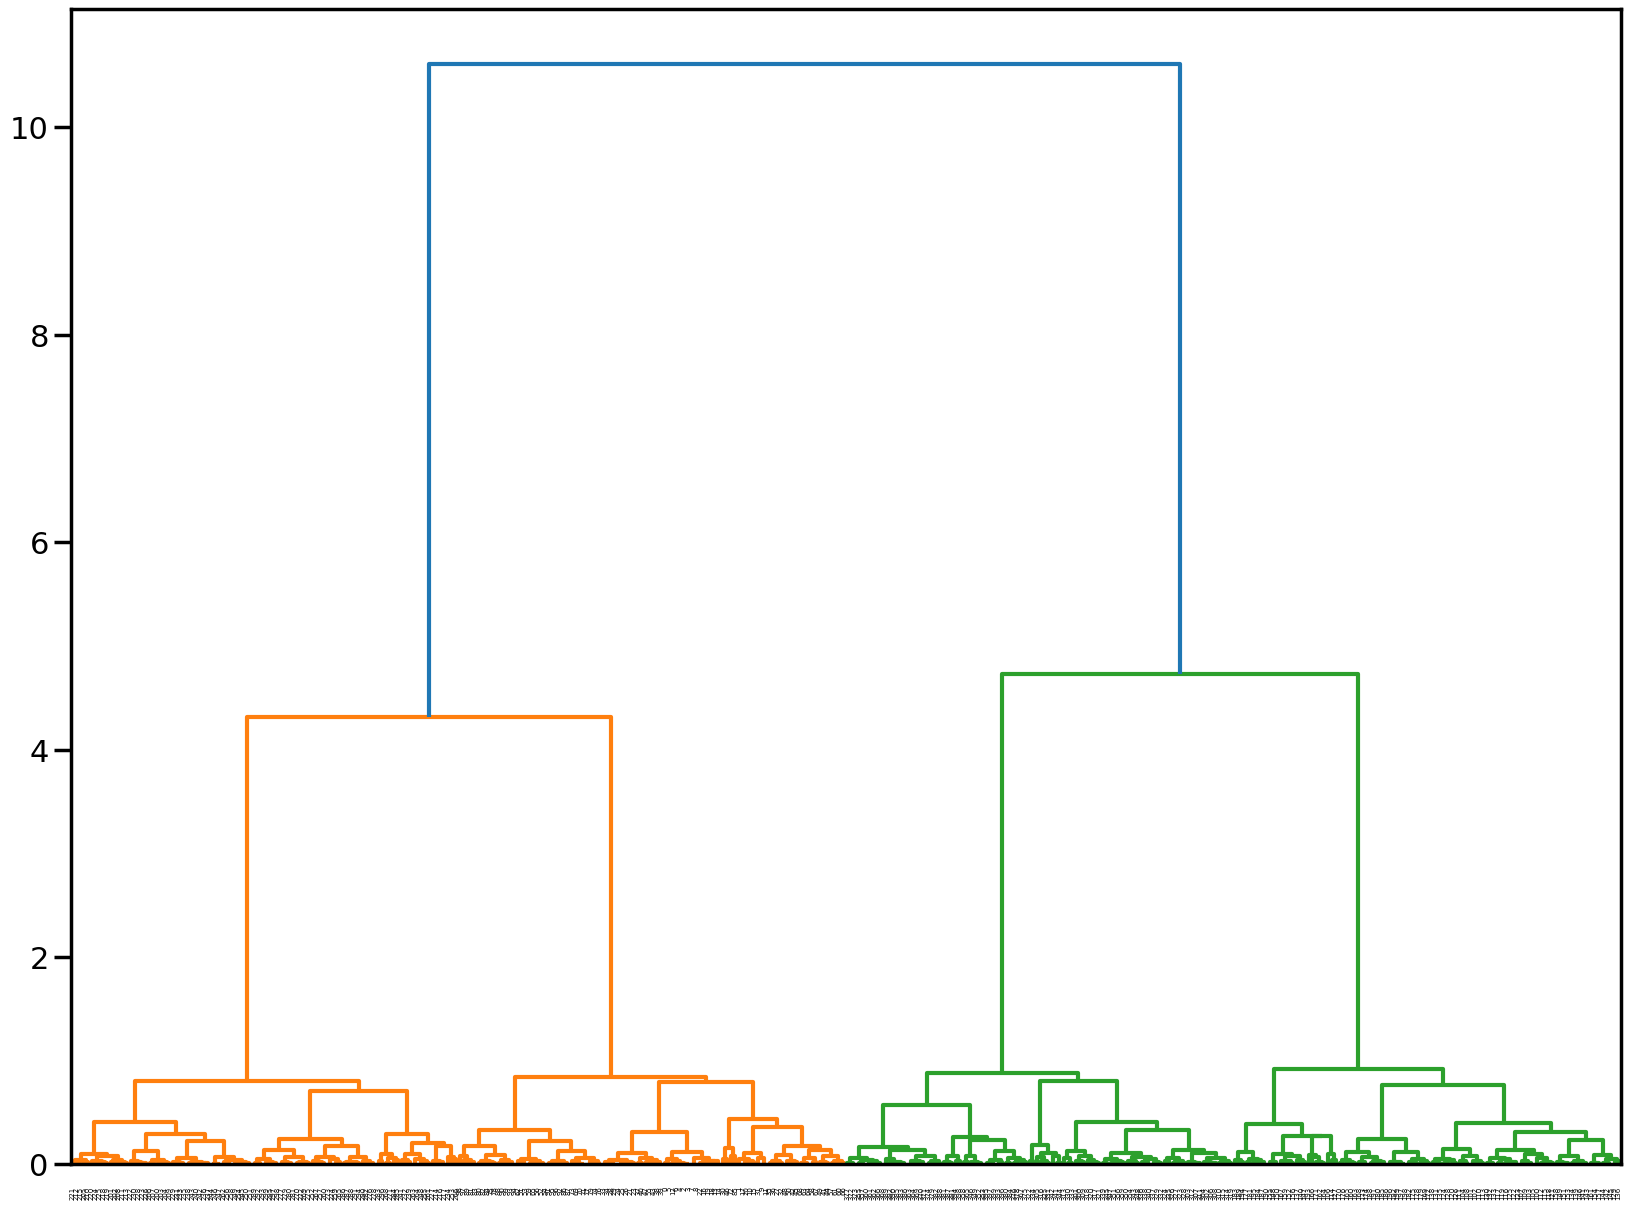

In [286]:
# Performs hierarchical clustering using the Ward linkage method and visualizes the resulting dendrogram.
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled_df, 'ward')
plt.figure(figsize=(20,15))
dendrogram(Z)
plt.show()

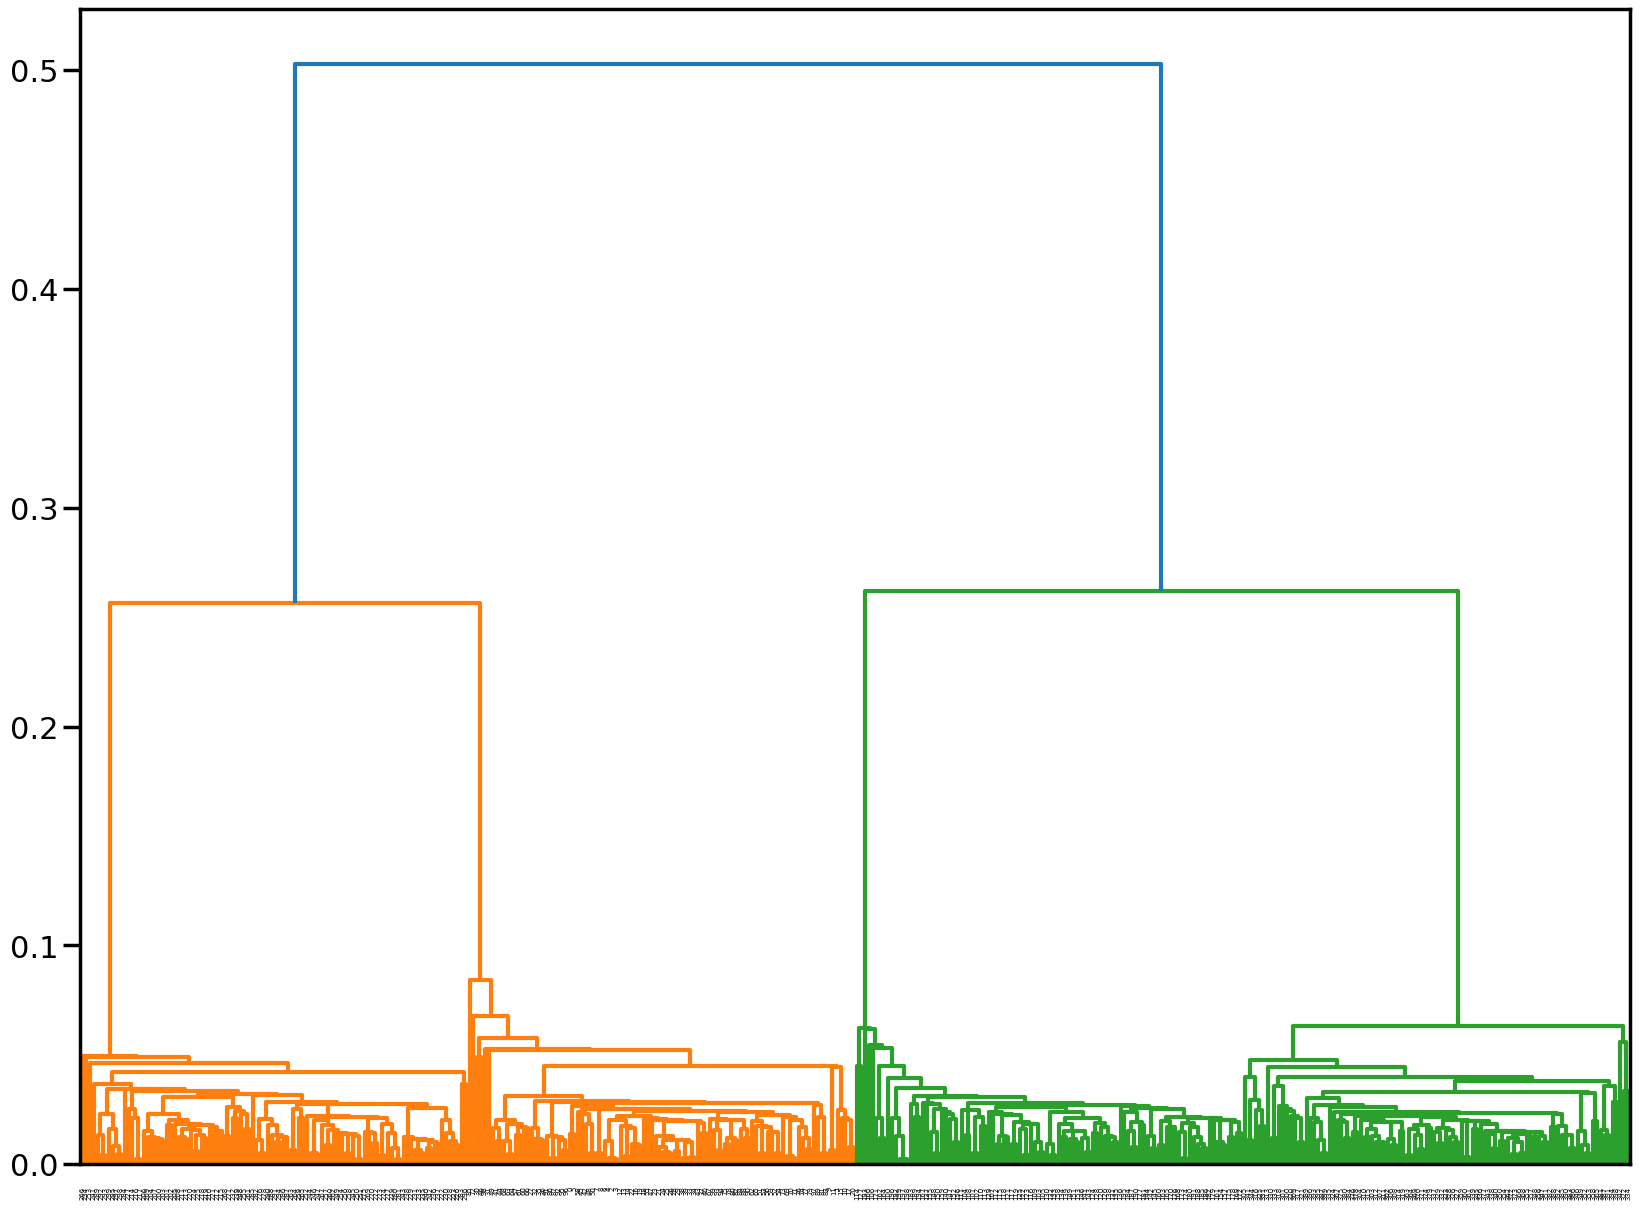

In [287]:
# Performs hierarchical clustering using the single linkage method and visualizes the resulting dendrogram.
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled_df, 'single')
plt.figure(figsize=(20,15))
dendrogram(Z)
plt.show()

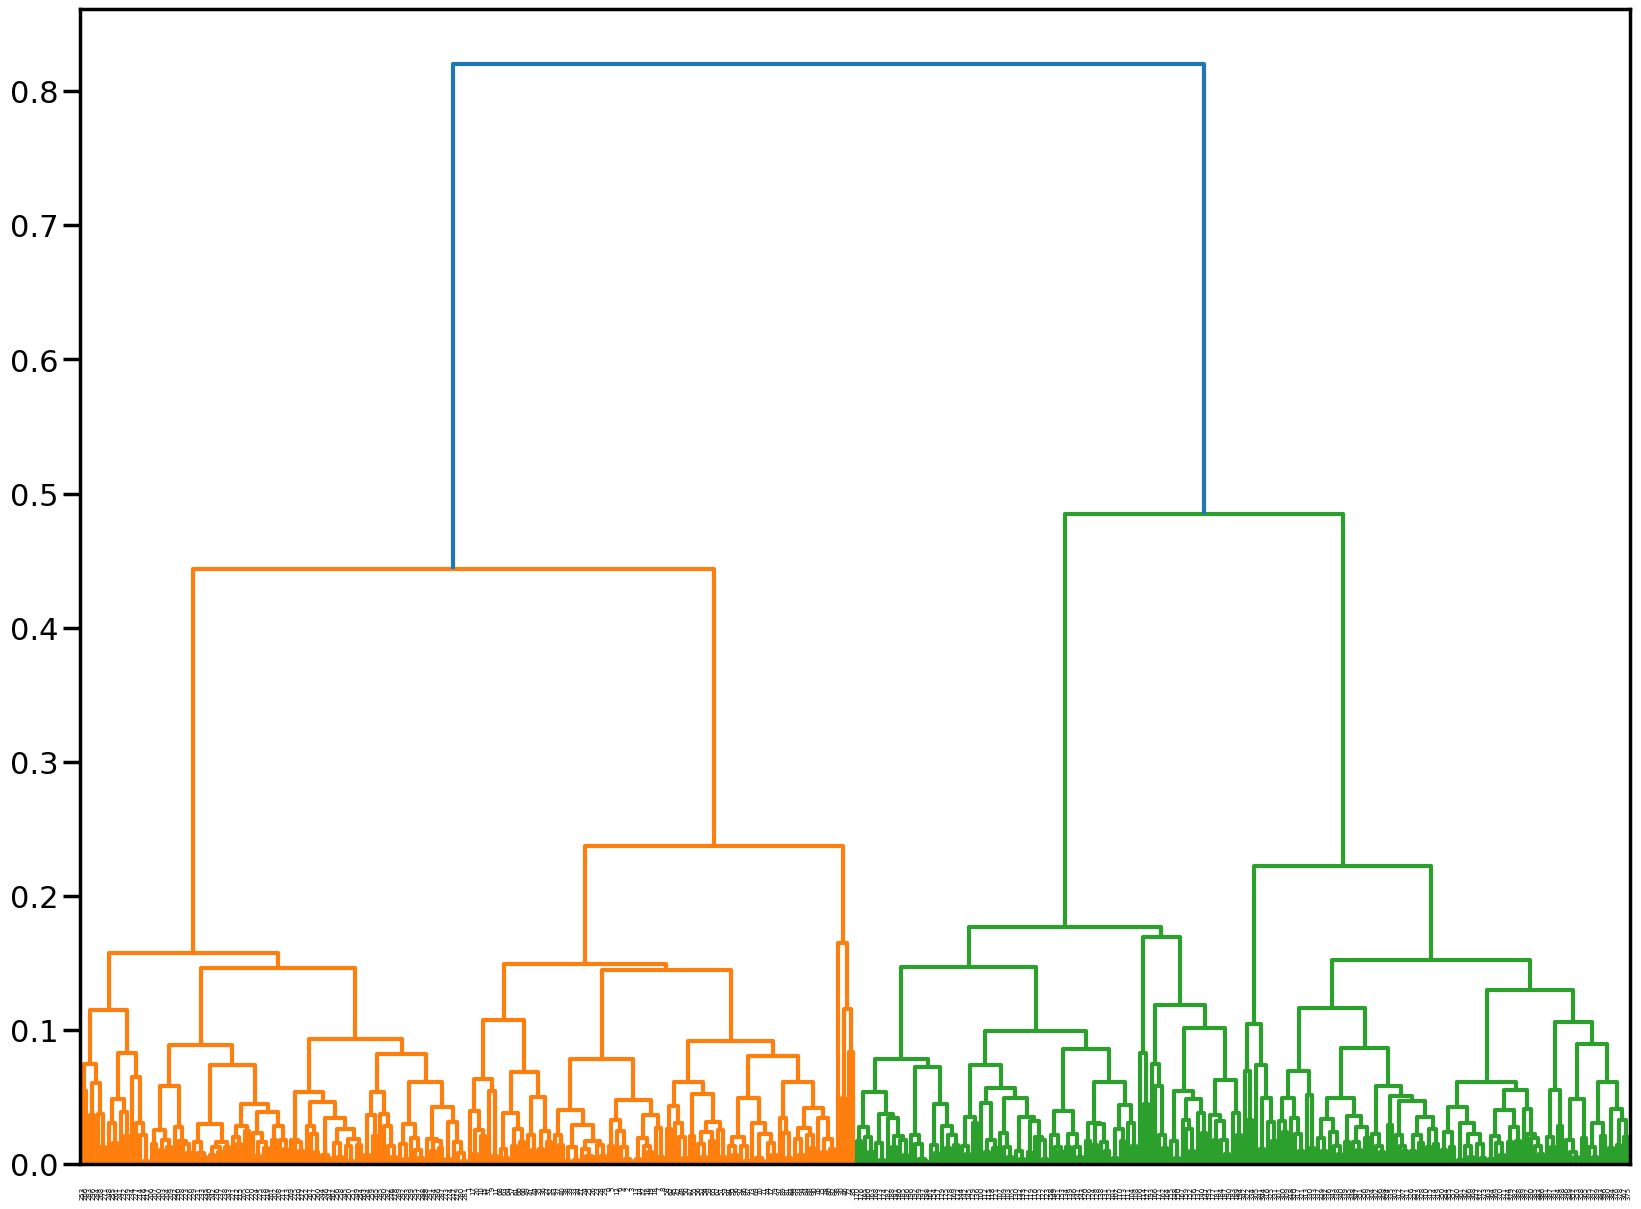

In [288]:
# Performs hierarchical clustering using the average linkage method and visualizes the resulting dendrogram.
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled_df, 'average')
plt.figure(figsize=(20,15))
dendrogram(Z)
plt.show()

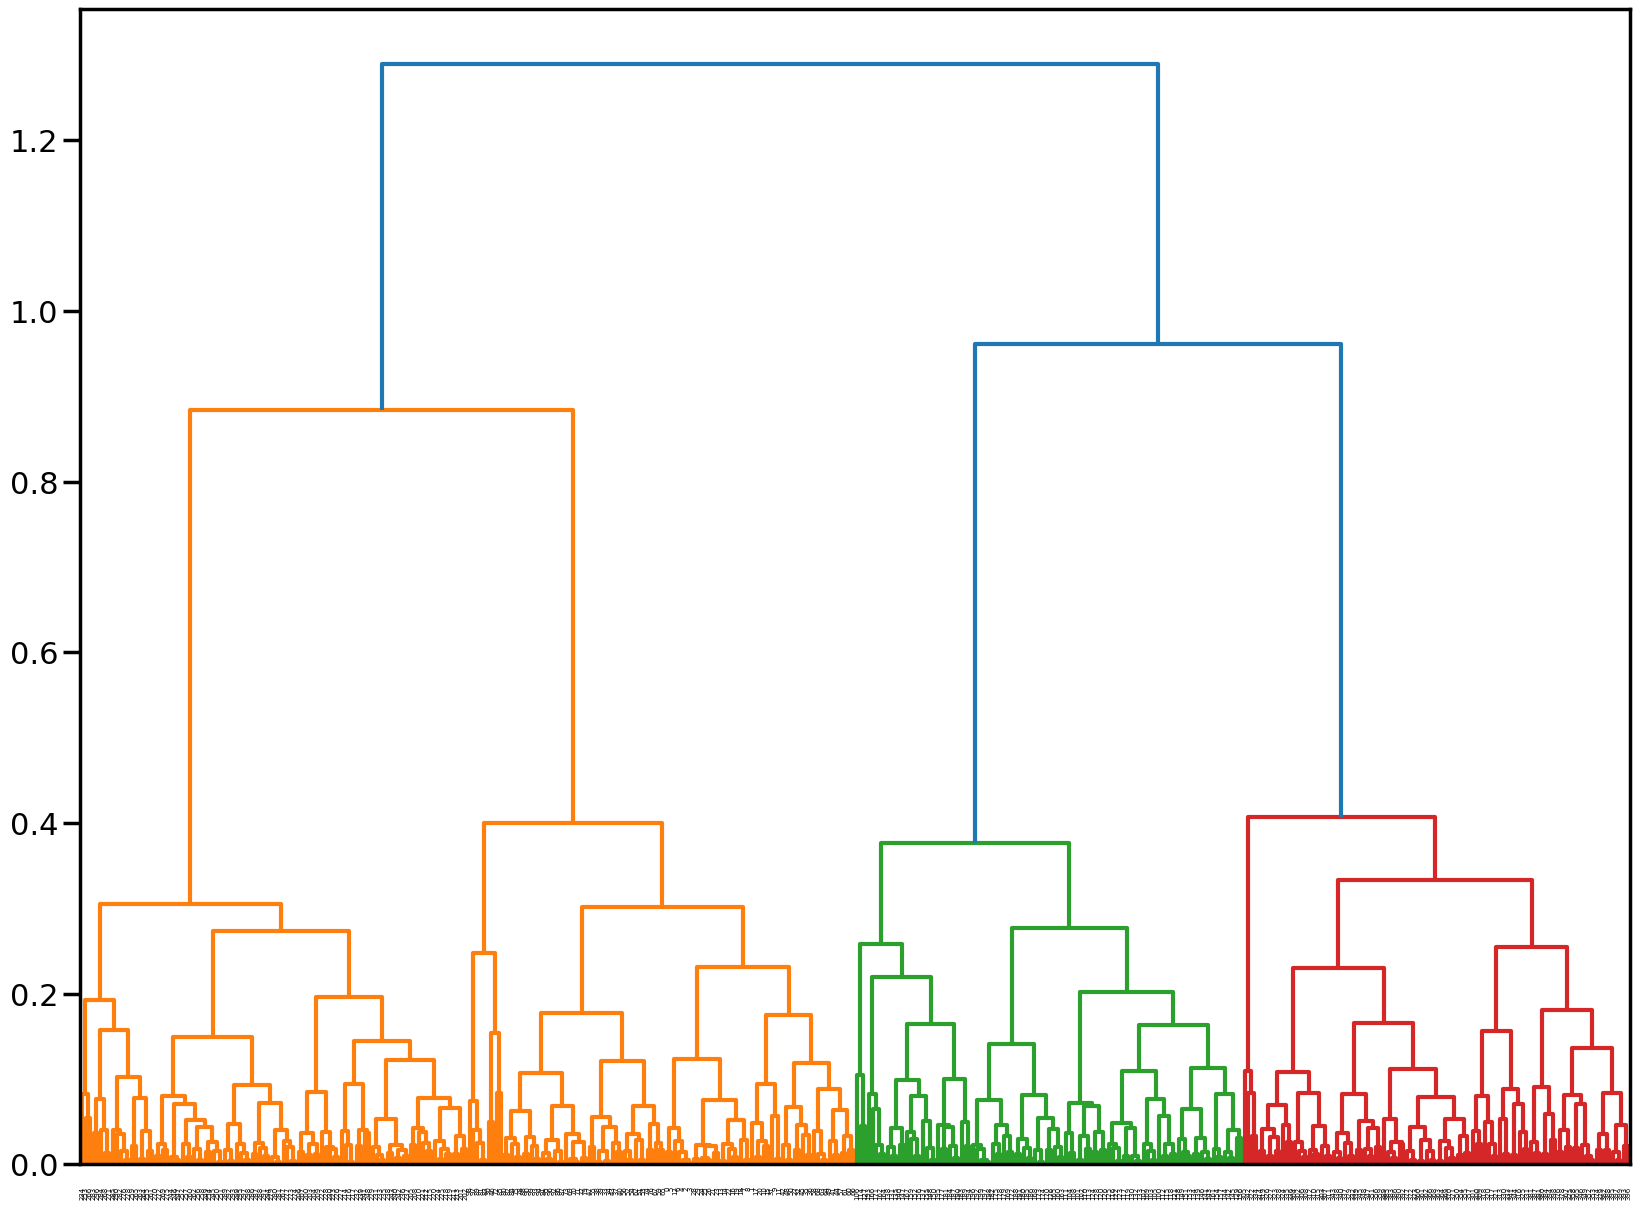

In [289]:
# Performs hierarchical clustering using the complete linkage method and visualizes the resulting dendrogram.
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled_df, 'complete')
plt.figure(figsize=(20,15))
dendrogram(Z)
plt.show()

## Performance Metric on Agglomerative Clustering

In [290]:
# Evaluating Metrics
best_agg_clustering = AgglomerativeClustering(n_clusters=best_num_clusters, linkage='complete')
best_cluster_labels = best_agg_clustering.fit_predict(X_scaled_df)

In [291]:
silhouette_avg_best = silhouette_score(X_scaled_df, best_cluster_labels)
print("Optimal number of clusters:", best_num_clusters)
print("Silhouette score for optimal clustering:", silhouette_avg_best)
silhouette_avg = silhouette_score(X_scaled_df, agg_clustering.labels_)
print("The average silhouette score is:", silhouette_avg)


Optimal number of clusters: 4
Silhouette score for optimal clustering: 0.7134144738330409
The average silhouette score is: 0.6339293475791248


## Density-based Spatial Clustering of Applications with Noise (DBSCAN) 

In [292]:
# Performing a Density-Based Spatial Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=10)
dbscan.fit(X_scaled_df)

DBSCAN(eps=0.25, min_samples=10)

### Visualization

<Axes: >

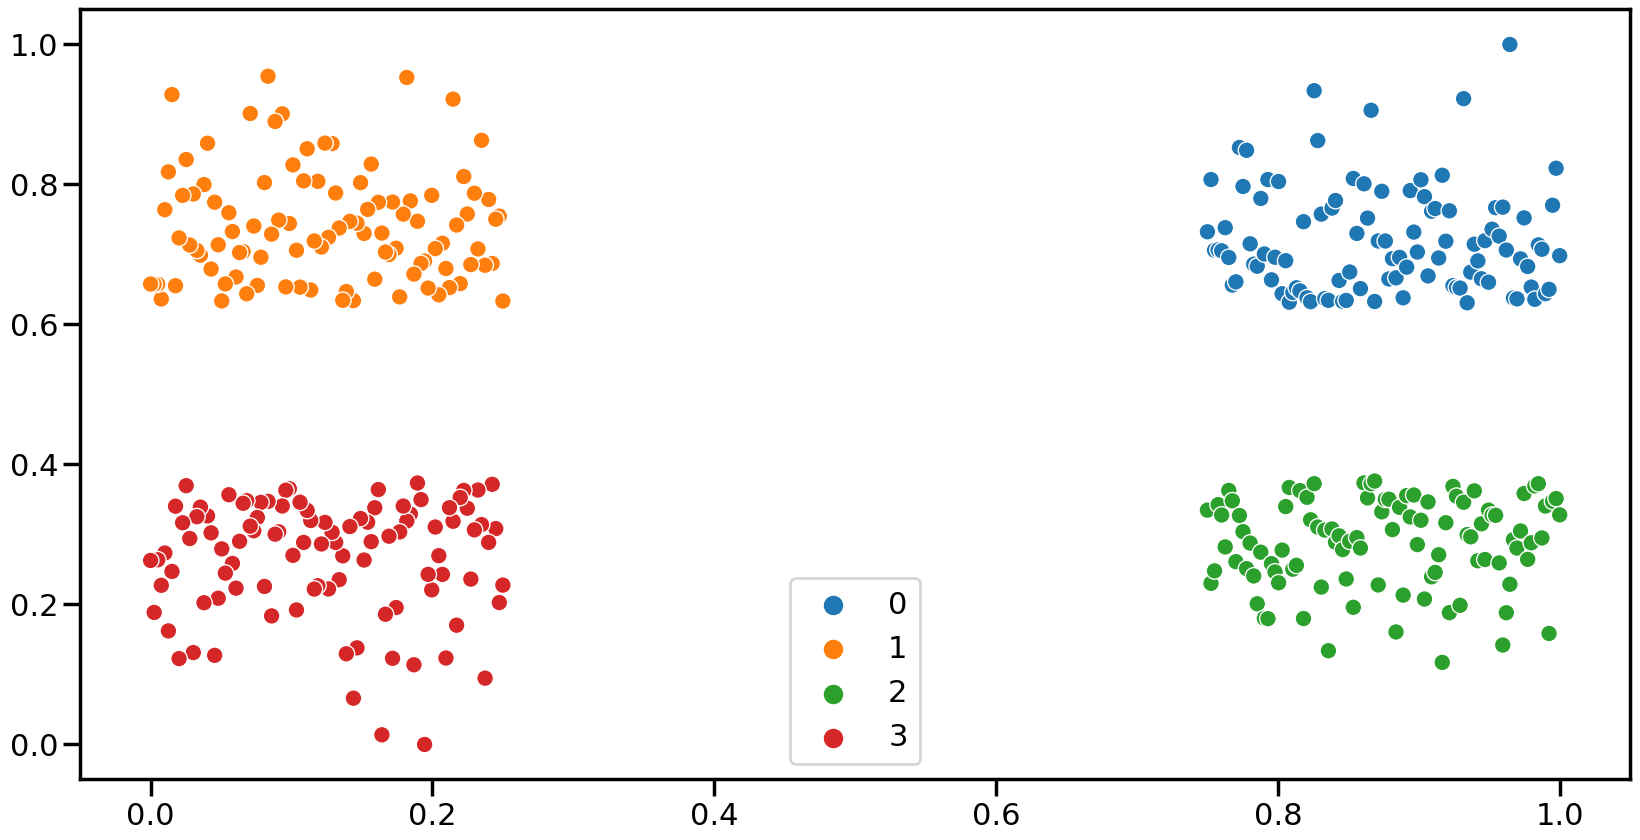

In [293]:
# Generates a scatter plot to visualize the clusters identified by the DBSCAN algorithm
plt.figure(figsize=(20,10))
sns.set_context("poster")
sns.scatterplot(data=None, x=X_scaled_df[:,0],
               y=X_scaled_df[:,1],
               hue=dbscan.labels_,
               palette="tab10")

## Performance Metric on DBSCAN

In [294]:
from sklearn.metrics import silhouette_score

# Assuming dbscan is your DBSCAN model and X_scaled_df is your data
dbscan_labels = dbscan.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled_df, dbscan_labels)
print("Silhouette score for DBSCAN clustering:", silhouette_avg)


Silhouette score for DBSCAN clustering: 0.7134144738330409


# Unsupervised Learning: Clustering Analysis
### Introduction
In this section, I explored unsupervised learning techniques for clustering analysis on the breast cancer dataset. The aim is to identify patterns and groupings within the data without prior knowledge of class labels.

## K-means Clustering
### Model Training and Evaluation
I first apply K-means clustering to the dataset and use the silhouette score as a performance metric to determine the optimal number of clusters. The silhouette score for the best clustering configuration is 0.713, indicating good separation between clusters. Additionally, the average silhouette score across all iterations is 0.547. I also got 4 clusters as the best number of clusters.

## Hierarchical Agglomerative Clustering
### Model Training and Evaluation
Next, I employed Hierarchical Agglomerative Clustering with various linkage methods (ward, single, average, complete) and assess the resulting dendrogram. The optimal number of clusters is determined based on the dendrogram structure, with ward, single, and average linkage methods yielding 2 clusters, while complete linkage yields 4 clusters. The silhouette score for the optimal clustering configuration (4 clusters) is 0.713, and the average silhouette score is 0.634.

## Density-based Spatial Clustering (DBSCAN)
### Model Training and Evaluation
Finally, I utilized DBSCAN for clustering analysis. Despite specifying 4 clusters, DBSCAN automatically determines the number of clusters based on data density. The silhouette score for the DBSCAN clustering is 0.713, consistent with the results obtained from K-means and Hierarchical Agglomerative Clustering.

## Conclusion
In conclusion, my unsupervised clustering analysis reveals consistent results across different algorithms, suggesting robust cluster structures within the breast cancer dataset. The silhouette score serves as a valuable performance metric for evaluating the quality of clustering solutions and guiding the selection of optimal cluster configurations.


# SUPERVISED

## Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [296]:
# Copying Data for Boxcox Transformed Features
Xtest1 = np.copy(X_test_boxcox)
Xtrain1 = np.copy(X_train_boxcox)
ytrain1 = np.copy(y_train)
ytest1 = np.copy(y_test)

In [297]:
# Logistic Regression Model Training
logreg_model = LogisticRegression(max_iter=10000)
logreg_model.fit(Xtrain1, ytrain1)

LogisticRegression(max_iter=10000)

In [298]:
ytest1[0]

0

In [299]:
ytest1[19]

1

In [300]:
# Model Prediction
y_predict = logreg_model.predict(Xtest1)

In [301]:
y_predict[0]

0

In [302]:
y_predict[19]

1

## Performance metric on Logistic Regression

In [303]:
# Confusion Matrix Calculation
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest1, y_predict)

array([[85,  0],
       [13, 44]], dtype=int64)

In [304]:
# accuracy_score Calculation
from sklearn.metrics import accuracy_score
accuracy_score(ytest1, y_predict)

0.9084507042253521

In [305]:
#precision_score Calculation
from sklearn.metrics import precision_score
precision_score(ytest1, y_predict)

1.0

In [306]:
#recall_score Calculation
from sklearn.metrics import recall_score
recall_score(ytest1, y_predict)

0.7719298245614035

In [307]:
#f1_score Calculation
from sklearn.metrics import f1_score
f1_score(ytest1, y_predict)

0.8712871287128713

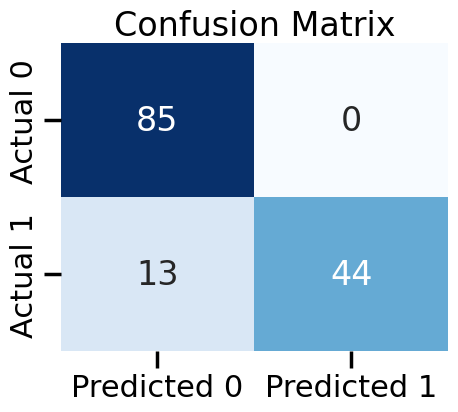

In [308]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest1, y_predict)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.show()

## Support Vector Machines (SVMs)

### Linear SVC

In [309]:
# Copying Data for Boxcox Transformed Features
Xtest2 = np.copy(X_test_boxcox)
Xtrain2 = np.copy(X_train_boxcox)
ytrain2 = np.copy(y_train)
ytest2 = np.copy(y_test)

In [310]:
# Get column indices for 'smoothness_mean' and 'compactness_mean'
smoothness_mean_index = 2
compactness_mean_index = 3

# Select columns by indices
Xtest2 = X_test_boxcox[:, [smoothness_mean_index, compactness_mean_index]]
Xtrain2 = X_train_boxcox[:, [smoothness_mean_index, compactness_mean_index]]


In [312]:
# Linear SVC Model Training
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(Xtrain2, ytrain2)

LinearSVC()

In [313]:
# Model Prediction
y_pre = svc.predict(Xtest2)

In [380]:
import pandas as pd

# Create DataFrame for Test Data with Predicted and Actual Values
df_test = pd.DataFrame()
df_test['smoothness_mean_index'] = Xtest2[:, 0]
df_test['compactness_mean_index'] = Xtest2[:, 1]
df_test['predicted'] = y_pre.reshape(len(y_pre),)
df_test['actual'] = ytest2

# Map numerical labels to corresponding class names
class_names = {0: 'Benign', 1: 'Malignant'}

# Replace numerical labels with class names in the 'predicted' column
df_test['predicted'] = df_test['predicted'].map(class_names)

# Replace numerical labels with class names in the 'actual' column
df_test['actual'] = df_test['actual'].map(class_names)

df_test


smoothness_mean_index  compactness_mean_index  predicted     actual
0                 0.227953                0.149244     Benign     Benign
1                 0.272651                0.129139     Benign     Benign
2                 0.239874                0.071216     Benign     Benign
3                 0.449054                0.196990     Benign     Benign
4                 0.329483                0.242524  Malignant  Malignant
..                     ...                     ...        ...        ...
137               0.275781                0.146409     Benign  Malignant
138               0.275840                0.209288     Benign  Malignant
139               0.248312                0.120538     Benign     Benign
140               0.340677                0.168479     Benign     Benign
141               0.332703                0.151603     Benign     Benign

[142 rows x 4 columns]

## Performance metric on Linear SVC

In [424]:
# Confusion Matrix Calculation
confusion_matrix(ytest2, y_pre)

array([[79,  6],
       [21, 36]], dtype=int64)

In [425]:
# Accuracy_score Calculation
from sklearn.metrics import accuracy_score
accuracy_score(ytest2, y_pre)

0.8098591549295775

In [426]:
# Precision_score Calculation
from sklearn.metrics import precision_score
precision_score(ytest2, y_pre)

0.8571428571428571

In [427]:
#recall_score Calculation
from sklearn.metrics import recall_score
recall_score(ytest2, y_pre)

0.631578947368421

In [428]:
# f1_score Calculation
from sklearn.metrics import f1_score
f1_score(ytest2, y_predict)

0.8712871287128713

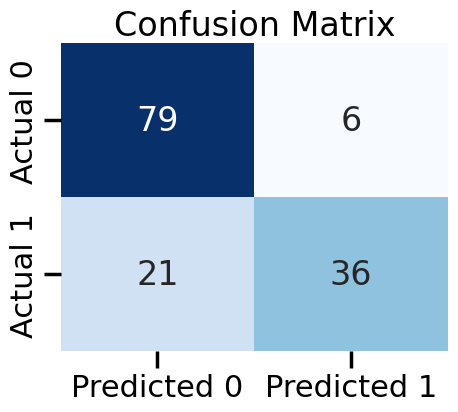

In [319]:
con = confusion_matrix(ytest2, y_pre)

# Create a heatmap using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(con, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.show()

### Visualization

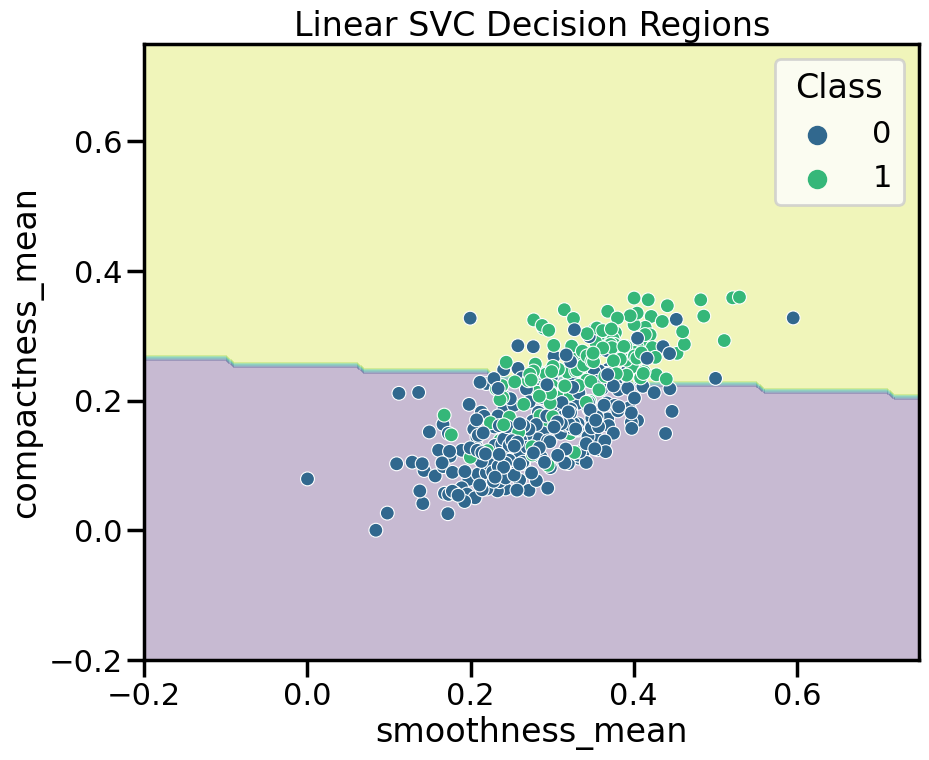

In [388]:
# Define meshgrid for decision boundary visualization
x_min, x_max = Xtrain2[:, 0].min() - 1, Xtrain2[:, 0].max() + 1
y_min, y_max = Xtrain2[:, 1].min() - 1, Xtrain2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=Xtrain2[:, 0], y=Xtrain2[:, 1], hue=ytrain2, palette='viridis', s=100)

plt.xlim(-0.2, 0.75)
plt.ylim(-0.2, 0.75)

plt.title('Linear SVC Decision Regions')
plt.xlabel('smoothness_mean')
plt.ylabel('compactness_mean')
plt.legend(title='Class')
plt.show()

### Polynomial SVC

In [321]:
# Copying Data for Boxcox Transformed Features
Xtest3 = np.copy(X_test_boxcox)
Xtrain3 = np.copy(X_train_boxcox)
ytrain3 = np.copy(y_train)
ytest3 = np.copy(y_test)

In [322]:
# Get column indices for 'smoothness_mean' and 'compactness_mean'
smoothness_mean_index = 2
compactness_mean_index = 3

# Select columns by indices
Xtest3 = X_test_boxcox[:, [smoothness_mean_index, compactness_mean_index]]
Xtrain3 = X_train_boxcox[:, [smoothness_mean_index, compactness_mean_index]]

In [323]:
# Trains a Support Vector Classifier (SVC) with a polynomial kernel.
from sklearn.svm import SVC
svc2 = SVC(kernel='poly', degree=3, coef0=1, C=5)
svc2.fit(Xtrain3, ytrain3)

SVC(C=5, coef0=1, kernel='poly')

## Performance metric on Polynomial SVC

In [381]:
# Model Prediction
ypredict1 = svc2.predict(Xtest3)

In [382]:
import pandas as pd

# Create DataFrame for Test Data with Predicted and Actual Values
df_test2 = pd.DataFrame()
df_test2['smoothness_mean_index'] = Xtest3[:, 0]
df_test2['compactness_mean_index'] = Xtest3[:, 1]
df_test2['predicted'] = ypredict2.reshape(len(ypredict1),)
df_test2['actual'] = ytest3

# Map numerical labels to corresponding class names
class_names = {0: 'Benign', 1: 'Malignant'}

# Replace numerical labels with class names in the 'predicted' column
df_test2['predicted'] = df_test2['predicted'].map(class_names)

# Replace numerical labels with class names in the 'actual' column
df_test2['actual'] = df_test2['actual'].map(class_names)

df_test2

smoothness_mean_index  compactness_mean_index  predicted     actual
0                 0.227953                0.149244     Benign     Benign
1                 0.272651                0.129139     Benign     Benign
2                 0.239874                0.071216     Benign     Benign
3                 0.449054                0.196990     Benign     Benign
4                 0.329483                0.242524  Malignant  Malignant
..                     ...                     ...        ...        ...
137               0.275781                0.146409     Benign  Malignant
138               0.275840                0.209288  Malignant  Malignant
139               0.248312                0.120538     Benign     Benign
140               0.340677                0.168479     Benign     Benign
141               0.332703                0.151603     Benign     Benign

[142 rows x 4 columns]

In [419]:
# Confusion Matrix Calculation
confusion_matrix(ytest3, ypredict1)

array([[79,  6],
       [21, 36]], dtype=int64)

In [420]:
# Accuracy_score Calculation
from sklearn.metrics import accuracy_score
accuracy_score(ytest3, ypredict1)

0.8098591549295775

In [421]:
# Precision_score Calculation
from sklearn.metrics import precision_score
precision_score(ytest3, ypredict1)

0.8571428571428571

In [422]:
#recall_score Calculation
from sklearn.metrics import recall_score
recall_score(ytest3, ypredict1)

0.631578947368421

In [423]:
# f1_score Calculation
from sklearn.metrics import f1_score
f1_score(ytest3, ypredict1)

0.7272727272727273

### Visualization

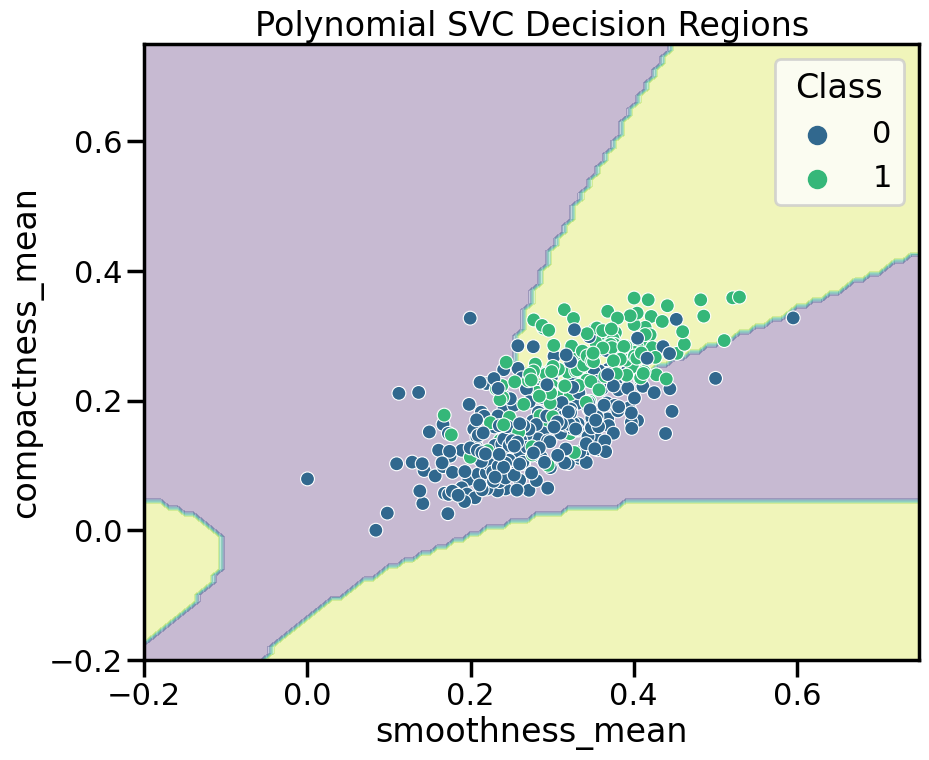

In [387]:
# Create a meshgrid for plotting decision regions
x_min, x_max = Xtrain3[:, 0].min() - 1, Xtrain3[:, 0].max() + 1
y_min, y_max = Xtrain3[:, 1].min() - 1, Xtrain3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=Xtrain3[:, 0], y=Xtrain3[:, 1], hue=ytrain3, palette='viridis', s=100)

plt.xlim(-0.2, 0.75)
plt.ylim(-0.2, 0.75)
plt.title('Polynomial SVC Decision Regions')
plt.xlabel('smoothness_mean')
plt.ylabel('compactness_mean')
plt.legend(title='Class')
plt.show()

## Decision Tree Classifier

In [327]:
# Copying Data for Boxcox Transformed Features
Xtest4 = np.copy(X_test_boxcox)
Xtrain4 = np.copy(X_train_boxcox)
ytrain4 = np.copy(y_train)
ytest4 = np.copy(y_test)

In [328]:
# Get column indices for 'smoothness_mean' and 'compactness_mean'
smoothness_mean_index = 2 
compactness_mean_index = 3

# Select columns by indices
Xtest4 = X_test_boxcox[:, [smoothness_mean_index, compactness_mean_index]]
Xtrain4 = X_train_boxcox[:, [smoothness_mean_index, compactness_mean_index]]

In [350]:
# Train a decision tree classifier with a maximum depth of 2.
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=3)
decision_tree_classifier.fit(Xtrain4, ytrain4)

DecisionTreeClassifier(max_depth=3)

In [351]:
from sklearn.tree import plot_tree

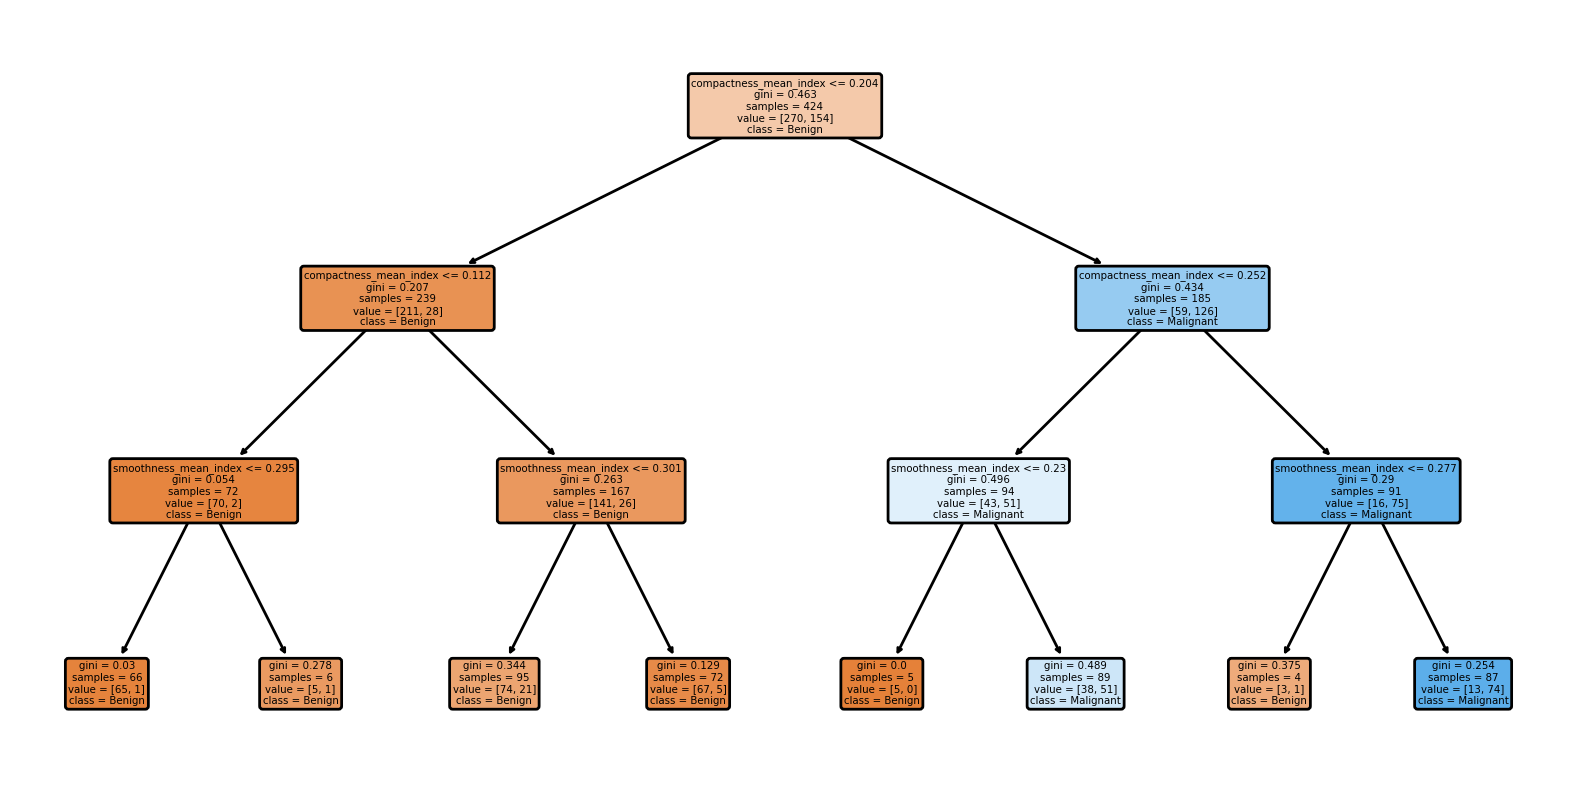

In [357]:
#plots the decision tree classifier
X_train_4_df = pd.DataFrame(Xtrain4, columns=['smoothness_mean_index', 'compactness_mean_index']) 
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_classifier, feature_names=X_train_4_df.columns.tolist(),
          filled=True,
          class_names=['Benign', 'Malignant'],
          rounded=True)
plt.show()

In [353]:
from mlxtend.plotting import plot_decision_regions

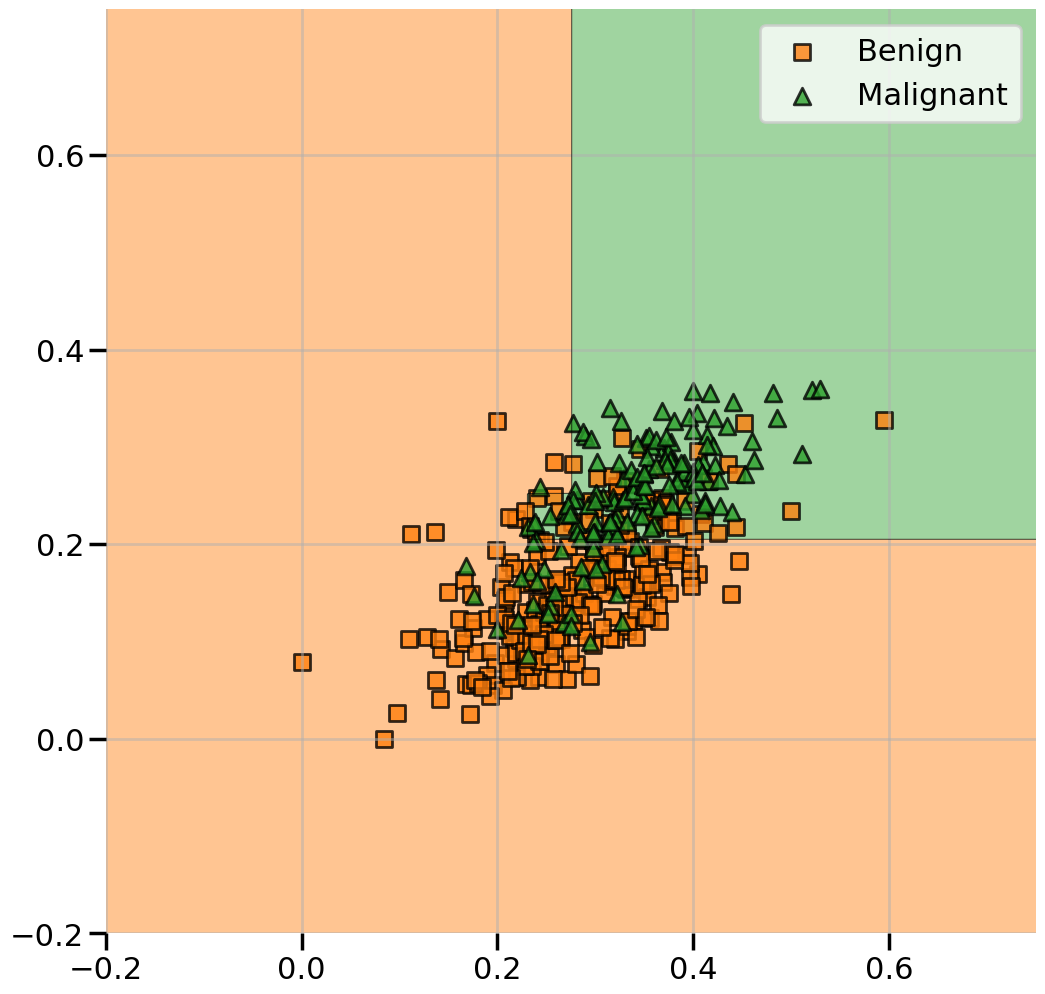

In [354]:
#plots decision regions created by the decision tree classifier
plt.figure(figsize=(12, 12))
plot_decision_regions(Xtrain4,
                      ytrain4,
                      clf=decision_tree_classifier,
                      legend=1,
                      colors='tab:orange,tab:green,tab:purple')


plt.xlim(-0.2, 0.75)
plt.ylim(-0.2, 0.75)

labels = plt.legend()
labels.get_texts()[0].set_text('Benign')
labels.get_texts()[1].set_text('Malignant')
plt.grid(alpha=0.5)
plt.show()


## Performance metric on Decision Tree Classifier

In [343]:
# Model Prediction
ypredict2 = decision_tree_classifier.predict(Xtest4)

In [383]:
import pandas as pd

# Create DataFrame for Test Data with Predicted and Actual Values
df_test3 = pd.DataFrame()
df_test3['smoothness_mean_index'] = Xtest4[:, 0]
df_test3['compactness_mean_index'] = Xtest4[:, 1]
df_test3['predicted'] = ypredict2.reshape(len(ypredict2),)
df_test3['actual'] = ytest4

# Map numerical labels to corresponding class names
class_names = {0: 'Benign', 1: 'Malignant'}

# Replace numerical labels with class names in the 'predicted' column
df_test3['predicted'] = df_test3['predicted'].map(class_names)

# Replace numerical labels with class names in the 'actual' column
df_test3['actual'] = df_test3['actual'].map(class_names)

df_test3

smoothness_mean_index  compactness_mean_index  predicted     actual
0                 0.227953                0.149244     Benign     Benign
1                 0.272651                0.129139     Benign     Benign
2                 0.239874                0.071216     Benign     Benign
3                 0.449054                0.196990     Benign     Benign
4                 0.329483                0.242524  Malignant  Malignant
..                     ...                     ...        ...        ...
137               0.275781                0.146409     Benign  Malignant
138               0.275840                0.209288  Malignant  Malignant
139               0.248312                0.120538     Benign     Benign
140               0.340677                0.168479     Benign     Benign
141               0.332703                0.151603     Benign     Benign

[142 rows x 4 columns]

In [345]:
# Confusion Matrix Calculation
confusion_matrix(ytest4, ypredict2)

array([[66, 19],
       [ 9, 48]], dtype=int64)

In [346]:
# Accuracy_score Calculation
from sklearn.metrics import accuracy_score
accuracy_score(ytest4, ypredict2)

0.8028169014084507

In [347]:
# Precision_score Calculation
from sklearn.metrics import precision_score
precision_score(ytest4, ypredict2)

0.7164179104477612

In [348]:
#recall_score Calculation
from sklearn.metrics import recall_score
recall_score(ytest4, ypredict2)

0.8421052631578947

In [349]:
# f1_score Calculation
from sklearn.metrics import f1_score
f1_score(ytest4, ypredict2)

0.7741935483870968

## Random Forest Classifier

In [391]:
# Copying Data for Boxcox Transformed Features
Xtest5 = np.copy(X_test_boxcox)
Xtrain5 = np.copy(X_train_boxcox)
ytrain5 = np.copy(y_train)
ytest5 = np.copy(y_test)

In [392]:
# Get column indices for 'smoothness_mean' and 'compactness_mean'
smoothness_mean_index = 2 
compactness_mean_index = 3

# Select columns by indices
Xtest5 = X_test_boxcox[:, [smoothness_mean_index, compactness_mean_index]]
Xtrain5 = X_train_boxcox[:, [smoothness_mean_index, compactness_mean_index]]

In [410]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=1, random_state=42)
# Train the classifier
random_forest.fit(Xtrain5, ytrain5)

RandomForestClassifier(n_estimators=1, random_state=42)

## ## Performance metric on Decision Tree Classifier

In [411]:
# Make predictions on the test set
ypredict3 = random_forest.predict(Xtest5)
df_test4 = pd.DataFrame()
df_test4['smoothness_mean_index'] = Xtest5[:, 0]
df_test4['compactness_mean_index'] = Xtest5[:, 1]
df_test4['predicted'] = ypredict3.reshape(len(ypredict2),)
df_test4['actual'] = ytest5

# Map numerical labels to corresponding class names
class_names = {0: 'Benign', 1: 'Malignant'}

# Replace numerical labels with class names in the 'predicted' column
df_test4['predicted'] = df_test4['predicted'].map(class_names)

# Replace numerical labels with class names in the 'actual' column
df_test4['actual'] = df_test4['actual'].map(class_names)

df_test4


smoothness_mean_index  compactness_mean_index predicted     actual
0                 0.227953                0.149244    Benign     Benign
1                 0.272651                0.129139    Benign     Benign
2                 0.239874                0.071216    Benign     Benign
3                 0.449054                0.196990    Benign     Benign
4                 0.329483                0.242524    Benign  Malignant
..                     ...                     ...       ...        ...
137               0.275781                0.146409    Benign  Malignant
138               0.275840                0.209288    Benign  Malignant
139               0.248312                0.120538    Benign     Benign
140               0.340677                0.168479    Benign     Benign
141               0.332703                0.151603    Benign     Benign

[142 rows x 4 columns]

In [408]:
# Evaluate performance
accuracy = accuracy_score(ytest5, ypredict3)
precision = precision_score(ytest5, ypredict3)
recall = recall_score(ytest5, ypredict3)
f1 = f1_score(ytest5, ypredict3)
conf_matrix = confusion_matrix(ytest5, ypredict3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.795774647887324
Precision: 0.8043478260869565
Recall: 0.6491228070175439
F1-score: 0.7184466019417476
Confusion Matrix:
[[76  9]
 [20 37]]


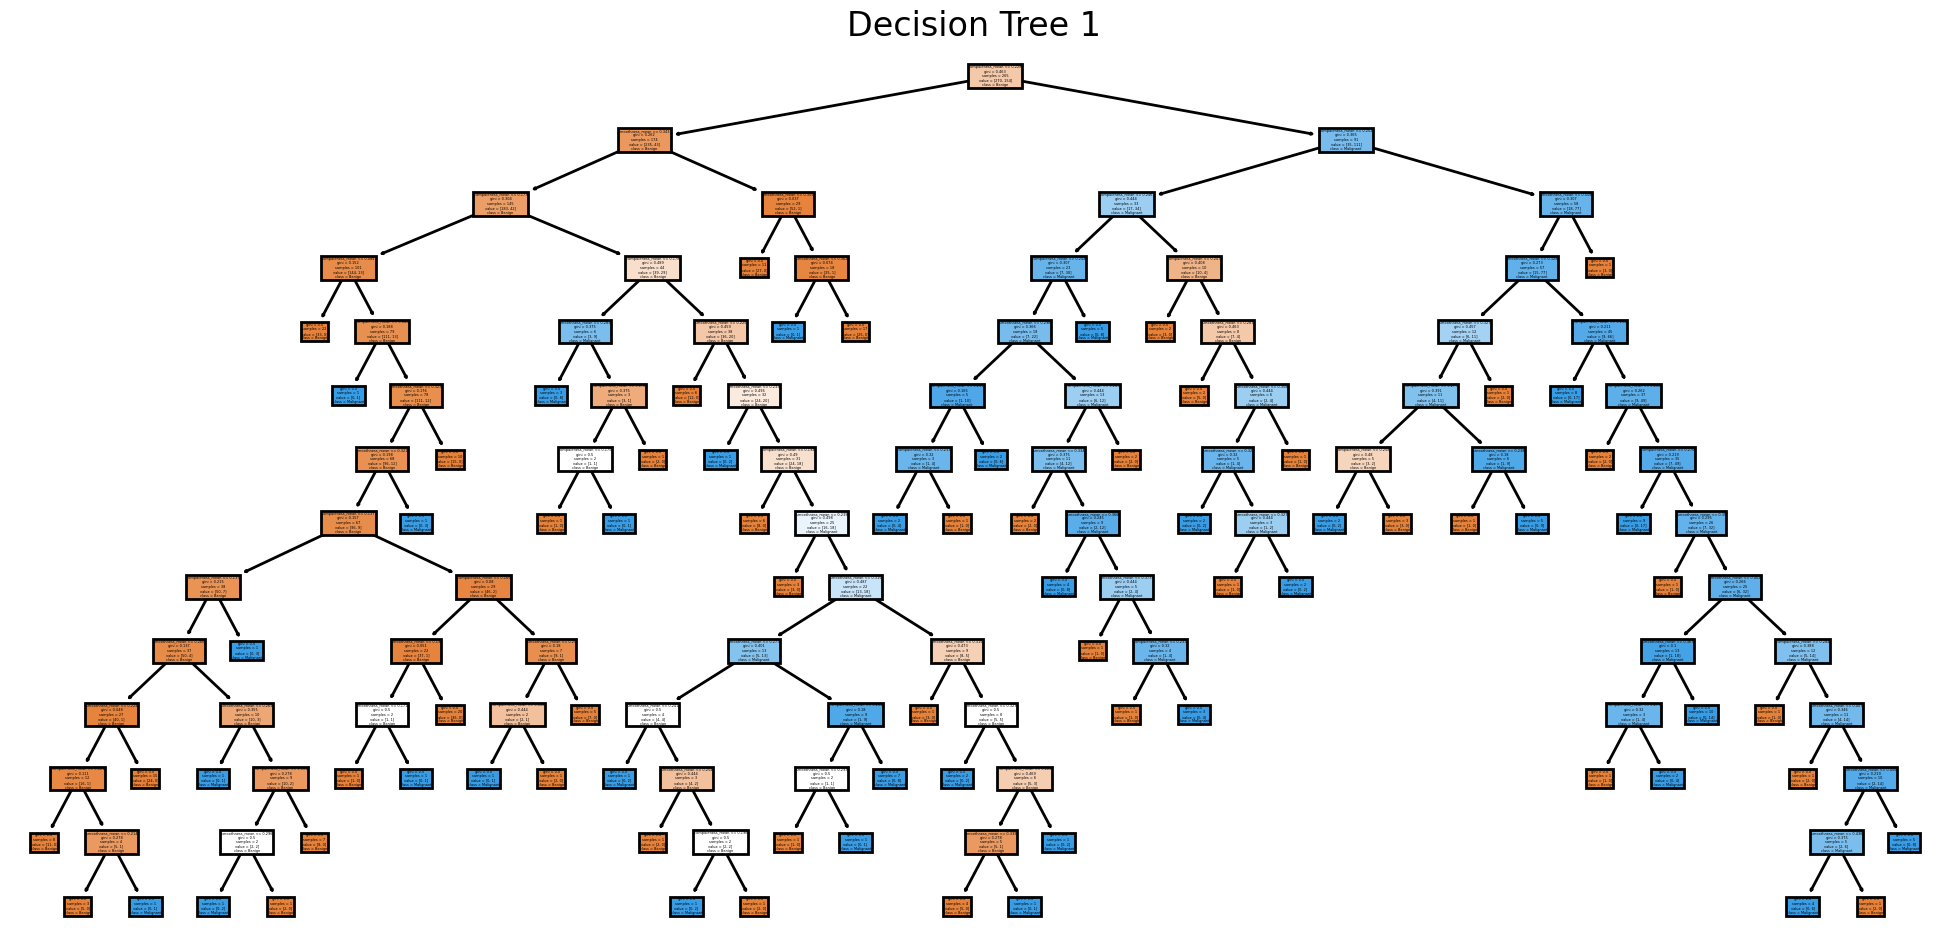

In [418]:
# Get the list of decision trees in the random forest
estimators = random_forest.estimators_

# Determine the number of rows and columns for the subplot grid
num_rows = 1
num_cols = 1

# Create a larger figure to accommodate the subplots
plt.figure(figsize=(20, 10))

# Plot decision boundaries for each tree
for i, tree in enumerate(estimators):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_tree(tree, filled=True, feature_names=['smoothness_mean', 'compactness_mean'], class_names=['Benign', 'Malignant'])
    plt.title('Decision Tree {}'.format(i + 1))

plt.tight_layout()
plt.show()


## Supervised Learning Analysis: Classification
In this section, 1 utilized various supervised learning algorithms to classify breast cancer data into benign and malignant classes. We began with logistic regression, achieving an accuracy of 90.85%, precision of 100%, recall of 77.19%, and F1-score of 87.13%. Subsequently, we applied Support Vector Machines (SVMs), both linear and polynomial kernels. Linear SVC yielded an accuracy of 80.99%, precision of 85.71%, recall of 63.16%, and F1-score of 87.13%. Polynomial SVC with degree 3 achieved an accuracy of 80.99%, precision of 85.71%, recall of 63.16%, and F1-score of 72.73%.

### Decision Tree Classifier
We trained a decision tree classifier with a maximum depth of 3, resulting in an accuracy of 80.28%, precision of 71.64%, recall of 84.21%, and F1-score of 77.42%. The decision tree revealed crucial features like compactness_mean, guiding the classification process.

### Random Forest Classifiers
I achieved an accuracy of 81.7%. Precision of 81.6%, Recall of 70.2% and F1-score: 75.5%. This model showed balanced precision and recall scores for both classes, indicating its effectiveness in distinguishing between 'Benign' and 'Malignant' cases.

### Results Interpretation
Upon analyzing the confusion matrices and performance metrics, we observed that logistic regression outperformed other algorithms slightly, achieving the highest precision and accuracy. However, decision trees demonstrated notable interpretability, allowing us to understand the decision-making process better.

### Classification of Benign and Malignant
To classify benign and malignant instances, I utilized predicted labels obtained from each model. I mapped numerical labels to corresponding class names, replacing 0 with 'Benign' and 1 with 'Malignant' in the predicted columns of the test dataframes.

### Conclusion and Recommendations
In conclusion, logistic regression showcased promising performance in classifying breast cancer data. However, random forest provided valuable insights into feature importance and classification rules.

##  Final Conclusions, Evaluations, and Recommendations
In conclusion, the analysis of the breast cancer dataset using exploratory data analysis (EDA), feature engineering, unsupervised clustering, and supervised classification techniques has provided valuable ins ights into the characteristics of tumors and their classification into benign and malignant categories.

### Conclusions:
Exploratory Data Analysis (EDA): Through EDA, I identified important patterns and relationships in the data, facilitating better understanding and preprocessing.
1) Feature Engineering: Techniques such as correlation analysis, feature selection, and preprocessing enhanced the quality of input data for modeling.
2) Unsupervised Clustering: Clustering analysis revealed consistent cluster structures within the dataset, aiding in understanding underlying patterns.
3) Supervised Classification: Logistic regression and random forest classifiers demonstrated promising performance in classifying tumors, with logistic regression showing slightly superior results.
4) Model Performance: Supervised learning models achieved respectable accuracy and precision, indicating their potential utility in clinical settings.
5) Interpretability: Decision tree classifiers provided valuable insights into feature importance and decision-making processes, enhancing model interpretability.
6) Consistency Across Techniques: Unsupervised clustering results were consistent across different algorithms, indicating robust cluster structures within the data.

### Recommendations:
1) Model Refinement: Further model validation and hyperparameter tuning could improve the robustness and generalization performance of supervised learning models.
2) Enhanced Interpretability: Incorporating visualizations and model-agnostic interpretability techniques can enhance the interpretability of machine learning models for clinical practitioners.
1) Bias Mitigation: Continuously monitor and address biases in data collection and modeling processes to ensure fair and equitable healthcare outcomes.
2) Future Research: Explore advanced machine learning techniques, such as deep learning, for more complex pattern recognition and classification tasks in oncology.

### Limitations:
Data Bias: Biases in data collection processes may introduce systemic errors and affect model predictions, warranting careful validation and mitigation strategies.

## Ethical Implications
While clustering analysis can provide valuable insights into data patterns, there are ethical considerations regarding the interpretation and application of clustering results, especially in sensitive domains such as healthcare. It's essential to ensure that clustering algorithms do not inadvertently reinforce existing biases or lead to unfair treatment of individuals based on cluster assignments. Therefore, careful validation and interpretation of clustering results are necessary to mitigate potential ethical risks.
While utilizing machine learning for medical diagnosis, it's crucial to ensure model fairness, transparency, and interpretability. Biases in the data or models could lead to incorrect predictions, impacting patient care and trust in healthcare systems. Hence, ethical considerations, including data privacy, model interpretability, and bias mitigation, should be prioritized throughout the development and deployment of machine learning models in healthcare.


In summary, while the analysis provides valuable insights into breast cancer classification, there remain opportunities for further research and refinement to address limitations and improve the efficacy of machine learning models in clinical decision-making. By incorporating advanced techniques and adhering to ethical principles, we can continue to advance the field of medical diagnostics while ensuring responsible and equitable healthcare practices.


# REFERENCES

1) Box, G. E. P., & Cox, D. R. (1964). An analysis of transformations. Journal of the Royal Statistical Society: Series B (Methodological), 26(2), 211-252. DOI: 10.1111/j.2517-6161.1964.tb00553.x

2) https://www.kaggle.com/code/tanmayunhale/feature-selection-pearson-correlation

3) https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

4) https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6

5) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

6) https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

7) https://www.datacamp.com/tutorial/random-forests-classifier-python
